<a href="https://colab.research.google.com/github/MoronSlayer/Deep-Learning-Projects/blob/learner/Team9_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the dictionary of features:

In [ ]:
dictionary = pd.read_excel('/content/drive/MyDrive/FinalProject/Data_Dictionary.xlsx')

Reading the given data.

In [ ]:
import warnings
warnings.filterwarnings("ignore")
data=pd.read_csv("/content/drive/MyDrive/FinalProject/loan.csv")

Looking at the shape of the given dataframe.

In [ ]:
data.shape

(39717, 111)

So we have 39,717 rows and 111 columns.

Let us look at the head of the data given.

In [ ]:
data.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


Setting the maximum number of rows and columns to display.

In [ ]:
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000

Looking at the information regarding the given data frame.

In [ ]:
data.info(data.info(max_cols=200))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

Looking at a brief description of the given data.

In [ ]:
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

So we see that there are many columns which have a majority of NAN and some columns that have only zeros.

Let us look at the percentage of zeros in each columns.

In [ ]:
def percentage_zero(x):
    count=0
    for i in range(len(x)):
        if(x[i]==0):
            count=count+1
        else:
            continue
    percentage=100*(count/len(x))
    return percentage
x=data.apply(percentage_zero,axis=0)
print(x)

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.324798
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           0.000000
emp_length                          0.000000
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                                0.000000
purpose                             0.000000
title                               0.000000
zip_code  

Storing the column names that have more than 85% of zeros to a list.

In [ ]:
max_zeros_85=['delinq_2yrs','pub_rec','out_prncp','out_prncp_inv','total_rec_late_fee',
              'recoveries','collection_recovery_fee',
              'collections_12_mths_ex_med','acc_now_delinq']
data=data.drop(columns=max_zeros_85)
data.shape

(39717, 102)

So 9 columns were dropped which had more than 90% of zeros. The current number of columns is 102.

In [ ]:
y=round(100*(data.isnull().sum()/len(data.index)))
Missing_Percentage_DF=y.rename(None).to_frame()
Missing_Percentage_DF.reset_index(level=0, inplace=True)
Missing_Percentage_DF.columns=['Attribute','%Missing']
Missing_Percentage_DF

,Attribute,%Missing
0,id,0.0
1,member_id,0.0
2,loan_amnt,0.0
3,funded_amnt,0.0
4,funded_amnt_inv,0.0
5,term,0.0
6,int_rate,0.0
7,installment,0.0
8,grade,0.0
9,sub_grade,0.0


Saving the columns that have more than 90% of NAN values to a list and dropping these columns.

In [ ]:
max_nan_90=Missing_Percentage_DF.loc[Missing_Percentage_DF['%Missing']>90,'Attribute'].tolist()
max_nan_90 = max_nan_90 + ['mths_since_last_record','next_pymnt_d','pub_rec_bankruptcies']
data=data.drop(columns=max_nan_90)
data.shape

(39717, 45)

So we are left with 46 columns. Let us see how our data looks like now. 

In [ ]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,chargeoff_within_12_mths,delinq_amnt,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,Jan-85,1,NaN,3,13648,83.70%,9,f,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62,May-16,1,INDIVIDUAL,0.0,0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,Apr-99,5,NaN,3,1687,9.40%,4,f,1008.710000,1008.71,456.46,435.17,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0.0,0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,Nov-01,2,NaN,2,2956,98.50%,10,f,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91,May-16,1,INDIVIDUAL,0.0,0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,Feb-96,1,35.0,10,5598,21%,37,f,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0.0,0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,Jan-96,0,38.0,15,27783,53.90%,38,f,3513.330000,3513.33,2475.94,1037.39,May-16,67.79,May-16,1,INDIVIDUAL,0.0,0,0.0


Let us look at the counts of unique values in each column.

In [ ]:
unique_count=data.apply(lambda x:len(x.unique()),axis=0)
print(unique_count)

id                          39717
member_id                   39717
loan_amnt                     885
funded_amnt                  1041
funded_amnt_inv              8205
term                            2
int_rate                      371
installment                 15383
grade                           7
sub_grade                      35
emp_title                   28821
emp_length                     12
home_ownership                  5
annual_inc                   5318
verification_status             3
issue_d                        55
loan_status                     3
pymnt_plan                      1
url                         39717
desc                        26528
purpose                        14
title                       19616
zip_code                      823
addr_state                     50
dti                          2868
earliest_cr_line              526
inq_last_6mths                  9
mths_since_last_delinq         96
open_acc                       40
revol_bal     

Looking at the columns that have only 1 value and storing the value present in these columns to a variable and dropping these columns.

In [ ]:
data[unique_count[unique_count==1].index.tolist()].apply(lambda x:x.unique(),axis=0)

,pymnt_plan,initial_list_status,policy_code,application_type,delinq_amnt
0,n,f,1,INDIVIDUAL,0


In [ ]:
pymnt_plan='n'
initial_list_status='f'
policy_code=1
application_type='INDIVIDUAL'
delinq_amnt=0
data=data.drop(columns=unique_count[unique_count==1].index.tolist())
data.shape

(39717, 40)

So we are left with 41 columns. Let us look at data we are left with.

In [ ]:
data.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,chargeoff_within_12_mths,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,Jan-85,1,NaN,3,13648,83.70%,9,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62,May-16,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,Apr-99,5,NaN,3,1687,9.40%,4,1008.710000,1008.71,456.46,435.17,Apr-13,119.66,Sep-13,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,Nov-01,2,NaN,2,2956,98.50%,10,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91,May-16,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,Feb-96,1,35.0,10,5598,21%,37,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48,Apr-16,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,Jan-96,0,38.0,15,27783,53.90%,38,3513.330000,3513.33,2475.94,1037.39,May-16,67.79,May-16,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,Nov-04,3,NaN,9,7963,28.30%,12,5632.210000,5632.21,5000.00,632.21,Jan-15,161.03,Jan-16,0.0,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan,280xx,NC,23.51,Jul-05,1,NaN,7,17726,85.60%,11,10110.840000,10110.84,6985.61,3125.23,May-16,1313.76,May-16,0.0,0.0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/16/11 > Downpayment for...,car,Car Downpayment,900xx,CA,5.35,Jan-07,2,NaN,4,8221,87.50%,4,3939.135294,3939.14,3000.00,939.14,Jan-15,111.34,Dec-14,0.0,0.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,NaN,4 years,OWN,40000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I own a small h...,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,Apr-04,2,NaN,11,5210,32.60%,13,646.020000,646.02,162.02,294.94,Apr-12,152.39,Aug-12,0.0,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,RENT,15000.0,Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/16/11 > I'm trying to b...,other,Building my credit history.,774xx,TX,18.08,Sep-04,0,NaN,2,9279,36.50%,3,1476.190000,1469.34,673.48,533.42,No

Merging the id which is an unique value to represent each loan and member id which is a unique value for the individual who takes a loan.

In [ ]:
data['LoanID-MemberID']=data['id'].map(str) + "_" + data['member_id'].map(str)

In [ ]:
data.shape

(39717, 41)

In [ ]:
data.drop_duplicates(subset ="LoanID-MemberID", keep = "first", inplace = True) 

In [ ]:
data.shape

(39717, 41)

So there are no records with duplicate values of LoanID-MemberID.

In [ ]:
data=data.drop(columns=['id','member_id'])
data.shape

(39717, 39)

Setting LoanID-MemberID as the index of the dataframe data.

In [ ]:
data=data.set_index('LoanID-MemberID')
print(data.shape)
data.head()

(39717, 38)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,chargeoff_within_12_mths,tax_liens
LoanID-MemberID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501_1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,Jan-85,1,NaN,3,13648,83.70%,9,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62,May-16,0.0,0.0
1077430_1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,Apr-99,5,NaN,3,1687,9.40%,4,1008.710000,1008.71,456.46,435.17,Apr-13,119.66,Sep-13,0.0,0.0
1077175_1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,Nov-01,2,NaN,2,2956,98.50%,10,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91,May-16,0.0,0.0
1076863_1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,Feb-96,1,35.0,10,5598,21%,37,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48,Apr-16,0.0,0.0
1075358_1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,Jan-96,0,38.0,15,27783,53.90%,38,3513.330000,3513.33,2475.94,1037.39,May-16,67.79,May-16,0.0,0.0


So we are left with 39 variables.
Let us explore each variable in order to clean them.<br>
## Data cleaning along with univariate analysis of individual columns. 

__loan_amnt__:The listed amount of the loan applied for by the borrower. If at some point in time,the credit department reduces the loan amount,then it will be reflected in this value.
This is a numeric variable.

Checking the number of missing values:

In [ ]:
data.loan_amnt.isnull().sum(axis=0)

0

So there are no missing values.

In [ ]:
data.loan_amnt.describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

Let us look at the box plot for the same.

Creating a user defined function for creating custom boxplot:

In [ ]:
def bplot(var,strTitle):
    sns.set_style("whitegrid")
    sns.boxplot(y=var)
    plt.title(strTitle)
    plt.show()

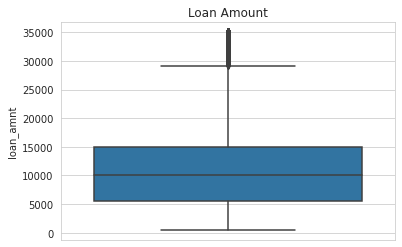

In [ ]:
bplot(data.loan_amnt,"Loan Amount")

So there are outliers on the upper tail which needs to be capped. Looking at the distribution of data quantile by quantile.

In [ ]:
data.loan_amnt.describe(percentiles=np.arange(0,1,0.01))

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
0%         500.000000
1%        1200.000000
2%        1500.000000
3%        2000.000000
4%        2000.000000
5%        2400.000000
6%        2500.000000
7%        2800.000000
8%        3000.000000
9%        3000.000000
10%       3200.000000
11%       3500.000000
12%       3600.000000
13%       4000.000000
14%       4000.000000
15%       4000.000000
16%       4200.000000
17%       4500.000000
18%       4800.000000
19%       5000.000000
20%       5000.000000
21%       5000.000000
22%       5000.000000
23%       5000.000000
24%       5000.000000
25%       5500.000000
26%       5600.000000
27%       6000.000000
28%       6000.000000
29.0%     6000.000000
30%       6000.000000
31%       6000.000000
32%       6400.000000
33%       6500.000000
34%       7000.000000
35%       7000.000000
36%       7000.000000
37%       7200.000000
38%       7500.000000
39%       7500.000000
40%       8000.000000
41%       

So we see that after the 96% there is a drastic increase. So we cap the values above this to 25484.

In [ ]:
data.loc[data['loan_amnt']>25484,'loan_amnt']=25484

Checking to see if the outliers are eliminated.

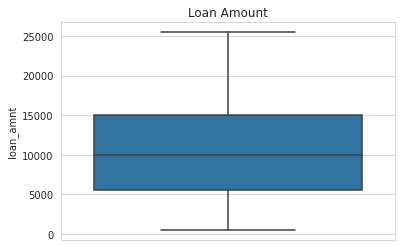

In [ ]:
bplot(data.loan_amnt,"Loan Amount")

In [ ]:
data.loan_amnt.describe()

count    39717.000000
mean     10967.187879
std       6808.588485
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      25484.000000
Name: loan_amnt, dtype: float64

So we have successfully eliminated the outliers, moving on to the next variable.<br>
<br>
__funded_amnt__: The total amount committed to that loan at that point in time. This is also a numerical variable.

Checking the number of missing values:

In [ ]:
data.funded_amnt.isnull().sum(axis=0)

0

So there are no missing values.

In [ ]:
data.funded_amnt.describe()

count    39717.000000
mean     10947.713196
std       7187.238670
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

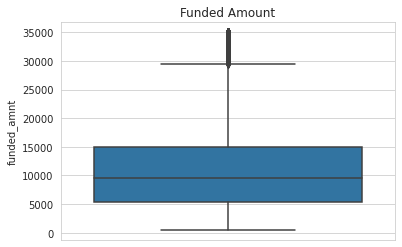

In [ ]:
bplot(data.funded_amnt,"Funded Amount")

So there are outliers on the upper tail which needs to be capped. Looking at the distribution of data quantile by quantile.

In [ ]:
data.funded_amnt.describe(percentiles=np.arange(0,1,0.01))

count    39717.000000
mean     10947.713196
std       7187.238670
min        500.000000
0%         500.000000
1%        1200.000000
2%        1500.000000
3%        2000.000000
4%        2000.000000
5%        2400.000000
6%        2500.000000
7%        2800.000000
8%        3000.000000
9%        3000.000000
10%       3200.000000
11%       3500.000000
12%       3600.000000
13%       4000.000000
14%       4000.000000
15%       4000.000000
16%       4200.000000
17%       4500.000000
18%       4800.000000
19%       4900.000000
20%       5000.000000
21%       5000.000000
22%       5000.000000
23%       5000.000000
24%       5000.000000
25%       5400.000000
26%       5600.000000
27%       6000.000000
28%       6000.000000
29.0%     6000.000000
30%       6000.000000
31%       6000.000000
32%       6250.000000
33%       6500.000000
34%       6700.000000
35%       7000.000000
36%       7000.000000
37%       7050.000000
38%       7200.000000
39%       7500.000000
40%       7800.000000
41%       

So based on the box plot and above quantile values.<br>
It would be most appropriate if we cap the outliers at 28000 that is 97% percentile.

In [ ]:
data.loc[data['funded_amnt']>28000,'funded_amnt']=28000

Checking to see if the outliers are eliminated.

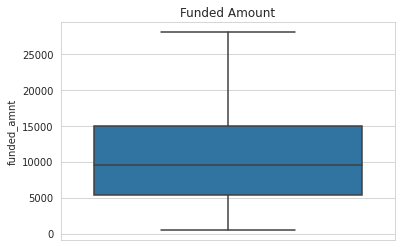

In [ ]:
bplot(data.funded_amnt,"Funded Amount")

So we have successfully eliminated the outliers, moving on to the next variable.<br>
<br>
__funded_amnt_inv__: The total amount committed by investors for that loan at that point in time. This is also a numerical variable.

Checking the number of missing values:

In [ ]:
data.funded_amnt_inv.isnull().sum(axis=0)

0

So there are no missing values.

In [ ]:
data.funded_amnt_inv.describe()

count    39717.000000
mean     10397.448868
std       7128.450439
min          0.000000
25%       5000.000000
50%       8975.000000
75%      14400.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

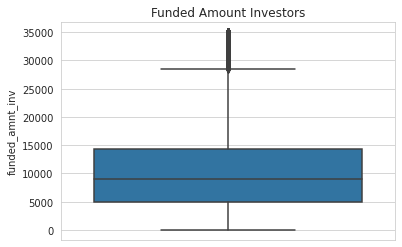

In [ ]:
bplot(data.funded_amnt_inv,"Funded Amount Investors")

So there are outliers on the upper tail which needs to be capped. Looking at the distribution of data quantile by quantile.

In [ ]:
data.funded_amnt_inv.describe(percentiles=np.arange(0,1,0.01))

count    39717.000000
mean     10397.448868
std       7128.450439
min          0.000000
0%           0.000000
1%         675.000643
2%        1000.000000
3%        1325.000000
4%        1500.000000
5%        1873.658000
6%        2000.000000
7%        2250.000000
8%        2475.000825
9%        2600.000000
10%       2950.000000
11%       3000.000000
12%       3000.000000
13%       3225.000000
14%       3500.000000
15%       3600.000000
16%       3950.000000
17%       4000.000000
18%       4000.000000
19%       4200.000000
20%       4500.000000
21%       4697.447600
22%       4800.000000
23%       4925.972745
24%       5000.000000
25%       5000.000000
26%       5000.000000
27%       5000.000000
28%       5375.000000
29.0%     5546.311246
30%       5762.705866
31%       5975.000000
32%       6000.000000
33%       6000.000000
34%       6000.000000
35%       6200.000000
36%       6400.000000
37%       6613.225094
38%       6950.000000
39%       7000.000000
40%       7000.000000
41%       

So based on the box plot and above quantile values.<br>
It would be most appropriate if we cap the outliers at 27013.537424 that is 97% percentile.

In [ ]:
data.loc[data['funded_amnt_inv']>27013.537424,'funded_amnt_inv']=27013.537424

Checking to see if the outliers are eliminated.

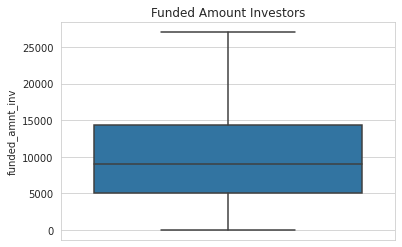

In [ ]:
bplot(data.funded_amnt_inv,"Funded Amount Investors")

So we have successfully eliminated the outliers, moving on to the next variable.<br>
<br>
__term__: The number of payments on the loan. Values are in months and can be either 36 or 60. This is a categorical variable.

Checking the number of missing values:

In [ ]:
data.term.isnull().sum(axis=0)

0

So there are no missing values.

Unique values are:

In [ ]:
data.term.unique().tolist()

[' 36 months', ' 60 months']

So there are not missing values.

Creating a user defined function to observe the counts of each level of the categorical variable.

In [ ]:
def cat_var_count(var_name):
  s = data[var_name].value_counts().head(10)
  print (s)
  plt.figure(figsize=(8,6))
  ax=s.plot.bar(width=.8) 
  for i, v in s.reset_index().iterrows():
    ax.text(i, v[var_name], v[var_name], color='black',ha="center",  va='bottom')
  plt.show()  


 36 months    29096
 60 months    10621
Name: term, dtype: int64


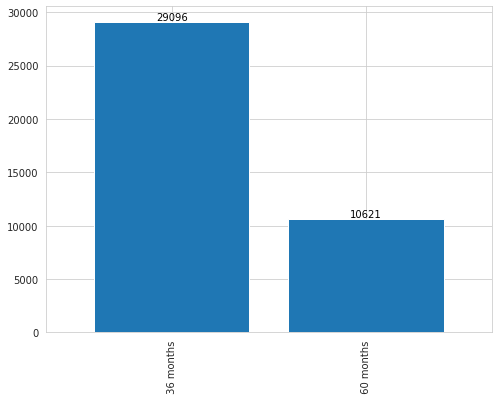

In [ ]:
cat_var_count('term')

So there are many more customers who have opted for the 36 months as compared to the 60 months.<br> <br>

__int_rate:__ Interest Rate on the loan.This is a numerical variable.

Checking the number of missing values:

In [ ]:
data.int_rate.isnull().sum(axis=0)

0

So there are no missing values.

In [ ]:
data['int_rate']

LoanID-MemberID
1077501_1296599    10.65%
1077430_1314167    15.27%
1077175_1313524    15.96%
1076863_1277178    13.49%
1075358_1311748    12.69%
                    ...  
92187_92174         8.07%
90665_90607        10.28%
90395_90390         8.07%
90376_89243         7.43%
87023_86999        13.75%
Name: int_rate, Length: 39717, dtype: object

In [ ]:
data['int_rate'].dtype

dtype('O')

So we need to remove '%' and convert the values into float.

In [ ]:
data['int_rate']=data['int_rate'].apply(lambda x: pd.Series(str(x).split('%')))[0].astype(float).tolist()

In [ ]:
data['int_rate'].dtype

dtype('float64')

Looking at a brief description of interest rate.

In [ ]:
data.int_rate.describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

Looking at the box plot for int_rate.

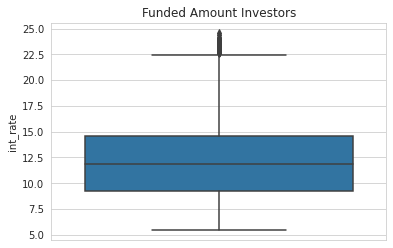

In [ ]:
bplot(data.int_rate,"Funded Amount Investors")

So there are outliers on the upper tail which needs to be capped. Looking at the distribution of data quantile by quantile.

In [ ]:
data.int_rate.describe(percentiles=np.arange(0,1,0.01))

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
0%           5.420000
1%           5.420000
2%           5.790000
3%           5.990000
4%           6.030000
5%           6.170000
6%           6.540000
7%           6.620000
8%           6.910000
9%           6.990000
10%          7.140000
11%          7.290000
12%          7.490000
13%          7.490000
14%          7.510000
15%          7.510000
16%          7.660000
17%          7.880000
18%          7.880000
19%          7.900000
20%          7.900000
21%          8.490000
22%          8.490000
23%          8.880000
24%          8.900000
25%          9.250000
26%          9.620000
27%          9.630000
28%          9.880000
29.0%        9.910000
30%          9.990000
31%         10.000000
32%         10.280000
33%         10.370000
34%         10.380000
35%         10.590000
36%         10.620000
37%         10.650000
38%         10.740000
39%         10.950000
40%         10.990000
41%       

So based on the box plot and above quantile values.<br>
It would be most appropriate if we cap the outliers at 20.99 that is 99% percentile.

In [ ]:
data.loc[data['int_rate']>20.99,'int_rate']=20.99

Checking to see if the outliers are eliminated.

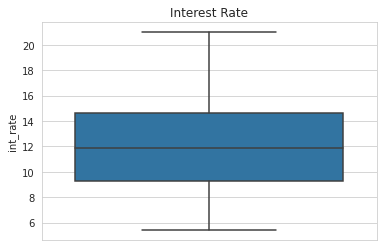

In [ ]:
bplot(data.int_rate,"Interest Rate")

So we notice that all the outliers are eliminated.<br><br>

__installment__: The monthly payment owed by the borrower if the loan originates. This is a numeric variable.

Checking the number of missing values:

In [ ]:
data.installment.isnull().sum(axis=0)

0

So there are no missing values.

Looking at a brief description of installment.

In [ ]:
data.installment.describe()

count    39717.000000
mean       324.561922
std        208.874874
min         15.690000
25%        167.020000
50%        280.220000
75%        430.780000
max       1305.190000
Name: installment, dtype: float64

Looking at the box plot for int_rate.

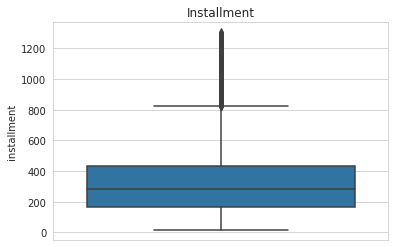

In [ ]:
bplot(data.installment,"Installment")

So there are outliers on the upper tail which needs to be capped. Looking at the distribution of data quantile by quantile.

In [ ]:
data.installment.describe(percentiles=np.arange(0,1,0.01))

count    39717.000000
mean       324.561922
std        208.874874
min         15.690000
0%          15.690000
1%          37.610000
2%          49.460000
3%          59.304000
4%          65.288400
5%          71.246000
6%          78.570000
7%          85.101200
8%          91.605600
9%          96.030000
10%         99.450000
11%        103.765200
12%        109.490000
13%        115.660000
14%        121.310000
15%        125.130000
16%        130.180000
17%        134.254400
18%        138.607600
19%        144.970800
20%        150.800000
21%        154.370000
22%        156.630400
23%        160.746800
24%        163.670000
25%        167.020000
26%        170.080000
27%        173.860000
28%        180.010000
29.0%      184.230000
30%        187.080000
31%        190.830000
32%        194.950000
33%        198.460000
34%        202.284400
35%        206.770000
36%        212.030000
37%        216.812800
38%        221.370000
39%        226.060000
40%        231.370000
41%       

So based on the box plot and above quantile values.<br>
It would be most appropriate if we cap the outliers at 805.08 that is 96% percentile.

In [ ]:
data.loc[data['installment']>805.08,'installment']=805.08

Checking to see if the outliers are eliminated.

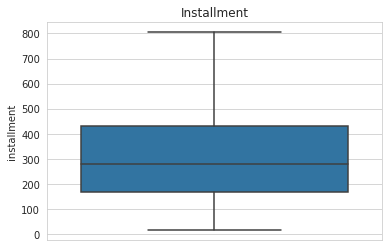

In [ ]:
bplot(data.installment,"Installment")

So we notice that all the outliers are eliminated. Let us move on to the next variable.<br><br>
__grade:__ LC assigned loan grade. This is a categorical variable.

Checking the number of missing values:

In [ ]:
data.grade.isnull().sum(axis=0)

0

So there are no missing values. 

B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64


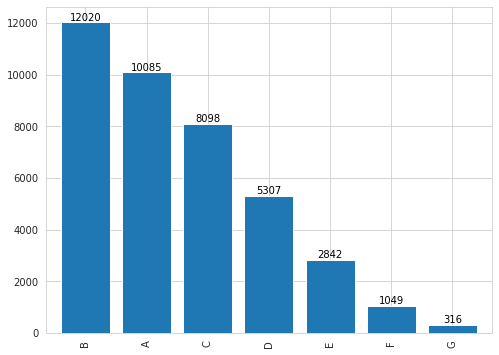

In [ ]:
cat_var_count('grade')

So we notice that the highest number of customers have a loan of grade B, then followed by grade A in second place and followed by grade C and so on.<br> Let us move on to the next variable.<br><br>
__sub_grade:__ LC assigned loan sub grade.

Checking the number of missing values:

In [ ]:
data.sub_grade.isnull().sum(axis=0)

0

So there are no missing values. 

Observing the value counts of the sub grade loan.

B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
C1    2136
B2    2057
C2    2011
B1    1830
A3    1810
Name: sub_grade, dtype: int64


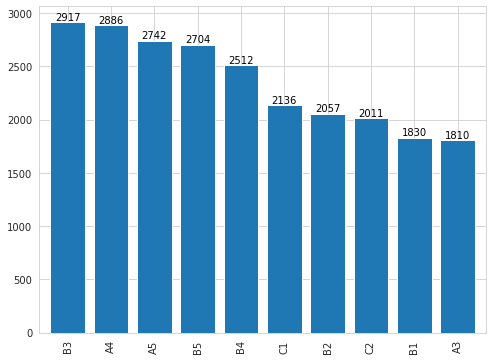

In [ ]:
cat_var_count('sub_grade')

In the previous plot we mentioned that the highest number of customers belong to grade B, in grade B we find that most of them belong to the sub-grade B3, the second highest grade of loan provided to the customers was A amongst the grade A loan customers, most of them had A4 type loan and finally the third highest loan grade was C and most of the customers who had a loan for this grade had a loan of sub grade C1. 

__emp_title:__ The job title supplied by the Borrower when applying for the loan.  Employer Title replaces Employer Name for all loans listed after 9/23/2013. <br>
Observing the column emp_title.

In [ ]:
data.emp_title

LoanID-MemberID
1077501_1296599                           NaN
1077430_1314167                         Ryder
1077175_1313524                           NaN
1076863_1277178           AIR RESOURCES BOARD
1075358_1311748      University Medical Group
                              ...            
92187_92174                   FiSite Research
90665_90607        Squarewave Solutions, Ltd.
90395_90390                               NaN
90376_89243                               NaN
87023_86999                  Evergreen Center
Name: emp_title, Length: 39717, dtype: object

We shall drop this column as it does not make much sense from business point of view for this analysis.

In [ ]:
data=data.drop(columns='emp_title')

Exploring the next feature, emp_length.<br>
__emp_length:__ Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. This is a categorical variable.Looking at its unique values.

Let us look at the unique values of emp_length.

In [ ]:
data.emp_length.unique().tolist()

['10+ years',
 '< 1 year',
 '1 year',
 '3 years',
 '8 years',
 '9 years',
 '4 years',
 '5 years',
 '6 years',
 '2 years',
 '7 years',
 nan]

So there are NAN in this variable. Let us look at how many of them are NAN.

In [ ]:
data.emp_length.isnull().sum(axis=0)

1075

Removing rows which contain NAN in emp_length.

In [ ]:
data=data.loc[data.emp_length.notnull()]
data.emp_length.isnull().sum(axis=0)

0

Creating lesser level by:<br>Assigning '< 1 year','2 years','3 years' as __LOW__.<br> Assigning '4 years','5 years','6 years' as __MODERATE__.<br> Assigning '7 years','8 years','9 years' as __HIGH__.<br> Assigning '10+ years' as __VERY HIGH__.

In [ ]:
def empLengthModify(a):
    if a== '< 1 year' or a== '2 years' or  a== '3 years':
        val="LOW"
    elif a== '4 years' or a== '5 years' or  a== '6 years':
        val="MODERATE"
    elif a=='7 years' or a=='8 years' or a=='9 years':
        val="HIGH"
    else:
        val="VERY HIGH"
    return val
data['emp_length']=data['emp_length'].apply(empLengthModify)

Observing the value counts of the newly created employee length levels.

LOW          13066
VERY HIGH    12119
MODERATE      8947
HIGH          4510
Name: emp_length, dtype: int64


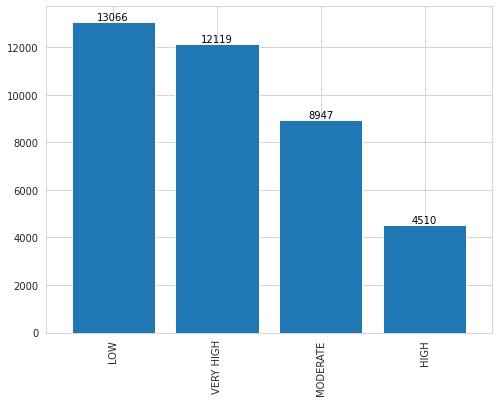

In [ ]:
cat_var_count('emp_length')

__home_ownership:__ The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

Checking the number of missing values:

In [ ]:
data.home_ownership.isnull().sum(axis=0)

0

So there are no missing values. 

Observing the value counts of the subcategories.

RENT        18488
MORTGAGE    17212
OWN          2841
OTHER          98
NONE            3
Name: home_ownership, dtype: int64


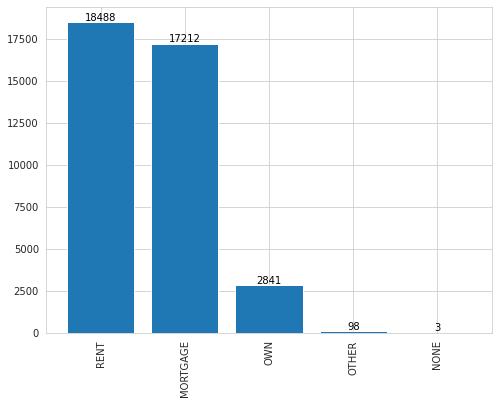

In [ ]:
cat_var_count('home_ownership')

We notice that a highest number of customers who take loans are the ones who stay in a rented accommodation, followed by the people who have a mortgage.

__annual_inc__: The self-reported annual income provided by the borrower during registration.

In [ ]:
data.annual_inc.astype(int).isnull().sum(axis=0)

0

So there are no missing values.

Looking at a brief description of annual income.

In [ ]:
data.annual_inc.describe(percentiles=np.arange(0,1,0.1))

count    3.864200e+04
mean     6.960828e+04
std      6.425320e+04
min      4.000000e+03
0%       4.000000e+03
10%      3.000000e+04
20%      3.800000e+04
30%      4.500000e+04
40%      5.100000e+04
50%      6.000000e+04
60%      6.656000e+04
70%      7.670000e+04
80%      9.000000e+04
90%      1.170000e+05
max      6.000000e+06
Name: annual_inc, dtype: float64

So let us bin the above annual income variable as follow:
1. LOW : People who are in the zero percentile to the thirty percentile range. i.e from 4.000000e+03 to 4.500000e+04<br>
2. MODERATE: People who are in the thirty percentile to the seventy percentile range. i.e. from 4.500000e+04 to 7.670000e+04.<br>
3. HIGH: People who are in the seventy to ninety percentile range. i.e from 7.670000e+04 to 1.170000e+05<br>
4. VERY_HIGH: People whose annual income is more than ninety percentile i.e greater than 1.170000e+05. These customers  are the outliers.

In [ ]:
def ann_inc_bin(a):
    if a>=4.000000e+03 and a<4.500000e+04:
        val='LOW'
    elif a>=4.500000e+04 and a<7.670000e+04:
        val='MODERATE'
    elif a>=7.670000e+04 and a<=1.170000e+05:
        val='HIGH'
    else:
        val="VERY_HIGH"
    return val
data.annual_inc=data.annual_inc.apply(ann_inc_bin)

Observing the value counts of the annual income bins created above.

MODERATE     15820
LOW          11228
HIGH          7739
VERY_HIGH     3855
Name: annual_inc, dtype: int64


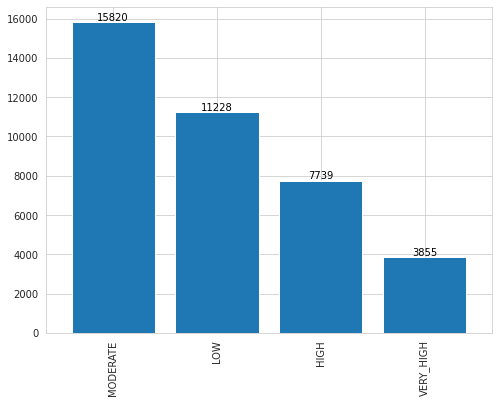

In [ ]:
cat_var_count('annual_inc')

So we notice that the highest number of loan customers have an annual income of 30%-70% percentiles of the annual 
income of customers, followed by customers who have less than 30% and so on.

The next variable that we will explore is the verification_status variable:<br>
__verification_status:__ Indicates if income was verified by LC, not verified, or if the income source was verified. This is a categorical variable.

The number of missing values present in this column are:

In [ ]:
data.verification_status.isnull().sum(axis=0)

0

So there are no missing values.

Looking at the counts of each level of verification status. 

Not Verified       16498
Verified           12353
Source Verified     9791
Name: verification_status, dtype: int64


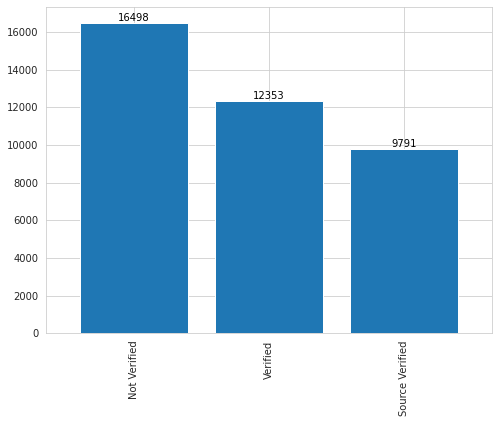

In [ ]:
cat_var_count('verification_status')

So we notice that many loans were given without verifying the source of annual income of the loan applicant. This is very risky as it may lead to a huge amount of credit loss.

The next variable that we will issue_d.<br>
__issue_d:__ The month which the loan was funded

In [ ]:
type(data.issue_d[0])

str

Converting the given issued date column of type string into date time objects.

In [ ]:
data.issue_d=pd.to_datetime(data.issue_d.str.upper(), format='%b-%y', yearfirst=False)

In [ ]:
print("The data given to us is from ",data.issue_d.min().day,'/',data.issue_d.min().month,'/',data.issue_d.min().year,
       " to",data.issue_d.max().day,'/',data.issue_d.max().month,'/',data.issue_d.max().year,".")

The data given to us is from  1 / 6 / 2007  to 1 / 12 / 2011 .


The next variable that we will explore is the loan_status variable.<br>
__loan_status:__ Current status of the loan, it indicates whether the loan is current, charged off or paid.

The number of missing values present in this column are:

In [ ]:
data.loan_status.isnull().sum(axis=0)

0

So there are no missing values.

Looking at the counts of each level of loan status.

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64


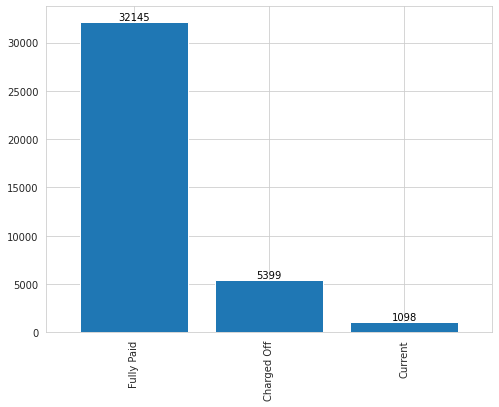

In [ ]:
cat_var_count('loan_status')

So about 5400 loans where charged off from 1/6/2007 to 1/12/2011 which is about 13% of the total loans provided.

The next variable to analyze is the 'url' variable.<br>
__url__: URL for the LC page with listing data. This variable is not important from the analysis point of view so I   
shall drop it.

In [ ]:
print("The number of columns before dropping this variable was %d"%len(data.columns))
data=data.drop(columns='url')
print("The number of columns after dropping this variable is %d"%len(data.columns))

The number of columns before dropping this variable was 37
The number of columns after dropping this variable is 36


The next variable to analyze is the 'desc' variable.<br>
__desc__: Loan description provided by the borrower. This variable is not important from the analysis point 
of view so I shall drop it.

In [ ]:
print("The number of columns before dropping this variable was %d"%len(data.columns))
data=data.drop(columns='desc')
print("The number of columns after dropping this variable is %d"%len(data.columns))

The number of columns before dropping this variable was 36
The number of columns after dropping this variable is 35


The next variable to explore is 'purpose':<br>
__purpose__: A category provided by the borrower for the loan request.  This is a categorical video.

Looking at the count of the missing values in this variable.

In [ ]:
data.purpose.isnull().sum(axis=0)

0

So there are no missing values in the purpose variable.

Let us look at the counts of various levels in this variable.

debt_consolidation    18242
credit_card            5000
other                  3833
home_improvement       2879
major_purchase         2115
small_business         1783
car                    1497
wedding                 934
medical                 668
moving                  559
Name: purpose, dtype: int64


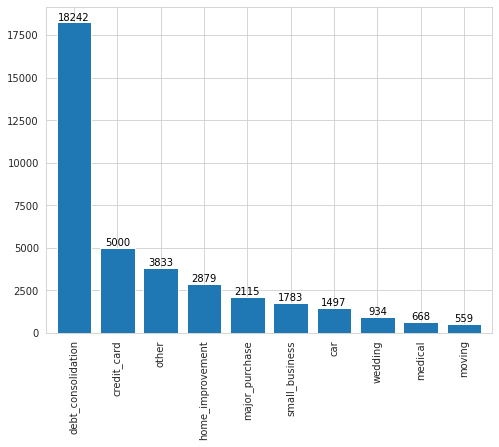

In [ ]:
cat_var_count("purpose")

From the above chart we find that the majority of people take loans for debt consolidation, followed by credit_card and so on.

The next variable to analyze is "title".<br>
__title__: The loan title provided by the borrower. This variable is not important from the analysis point of view so I am dropping it.

In [ ]:
print("The number of columns before dropping this variable was %d"%len(data.columns))
data=data.drop(columns='title')
print("The number of columns after dropping this variable is %d"%len(data.columns))

The number of columns before dropping this variable was 35
The number of columns after dropping this variable is 34


The next variable to observe is the 'zip_code'.<br>
__zip_code__: The first 3 numbers of the zip code provided by the borrower in the loan application. Since the complete 
             zip is not provided, we shall drop this variable

In [ ]:
print("The number of columns before dropping this variable was %d"%len(data.columns))
data=data.drop(columns='zip_code')
print("The number of columns after dropping this variable is %d"%len(data.columns))

The number of columns before dropping this variable was 34
The number of columns after dropping this variable is 33


The next variable to analyze is addr_state.<br>
__addr_state:__The state provided by the borrower in the loan application

The number of empty values in this variable is:

In [ ]:
data.addr_state.isnull().sum(axis=0)

0

So there are no null values in this variable.

Let us look at the counts of various levels in this variable.

CA    6911
NY    3709
FL    2776
TX    2672
NJ    1825
IL    1488
PA    1483
VA    1378
GA    1357
MA    1310
Name: addr_state, dtype: int64


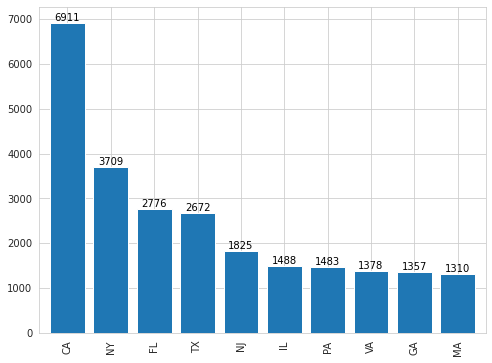

In [ ]:
cat_var_count("addr_state")

So we find that most of the loan applicants are from California, followed by New York, Florida and so on.

The next variable to analyze is 'dti'.<br>
__'dti'__: A  debt to income ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.This is clearly a numerical variable.

Let us look at the number of null values in this column.

In [ ]:
data.dti.isnull().sum()

0

So there are no empty values in the given dataframe.

In [ ]:
data.dti.describe()

count    38642.000000
mean        13.325108
std          6.666902
min          0.000000
25%          8.200000
50%         13.415000
75%         18.590000
max         29.990000
Name: dti, dtype: float64

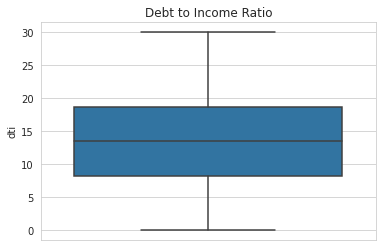

In [ ]:
bplot(data.dti,"Debt to Income Ratio")

So there are no outliers that needs to be dealt with.

The next column that we will explore is the 'earliest_cr_line'.<br>
__earliest_cr_line:__ The month the borrower's earliest reported credit line was opened.<br>
__Credit Line:__ A credit line is a pool of money available for borrowing. Also known as a line of credit, these loans have a maximum limit, and borrowers have the option of borrowing any amount up to that limit (or not using any of the money at all).

Let us look at the number of missing values in this column.

In [ ]:
data.earliest_cr_line.isnull().sum()

0

So there are no missing values in this column. Checking to see if the data type of the column is of string type, if so, we shall convert it to a data time object.

In [ ]:
type(data.earliest_cr_line[0])

str

Converting the given issued date column of type string into date time objects.

In [ ]:
data.earliest_cr_line=pd.to_datetime(data.earliest_cr_line.str.upper(), format='%b-%y', yearfirst=False)

We notice that the loans were issued between 1/6/2007  and 1/12/2011, so the credit line cannot have a year greater than 2011. So we shall remove the years greter than 2011.

In [ ]:
print("The number of rows before filtering is %d"%len(data.index))
data=data.loc[data.earliest_cr_line.dt.year<2011]
print("The number of rows after filtering is %d"%len(data.index))

The number of rows before filtering is 38642
The number of rows after filtering is 38581


In [ ]:
print("The oldest year in which a credit line was opened for a customer was ",min(data.earliest_cr_line.dt.year))
print("The latest year in which a credit line was opened for a customer was ",max(data.earliest_cr_line.dt.year))

The oldest year in which a credit line was opened for a customer was  1969
The latest year in which a credit line was opened for a customer was  2008


So for the customers for whom the loans were issued between 1/6/2007 and 1/12/2011, their earliest credit lines were opened between 1969 and 2008.

The next attribute that we explore is 'inq_last_6mths'.<br>
__inq_last_6mths__:The number of inquiries in past 6 months (excluding auto and mortgage inquiries).<br> Let us look at the number of missing values in this column.

In [ ]:
data.inq_last_6mths.isnull().sum()

0

So there are no missing values.

Let us look at the counts of various levels in this variable.

0    18716
1    10670
2     5660
3     2971
4      311
5      144
6       61
7       33
8       15
Name: inq_last_6mths, dtype: int64


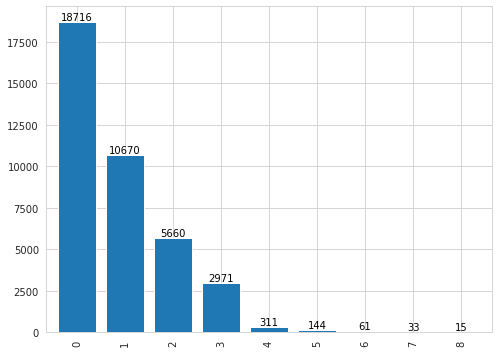

In [ ]:
cat_var_count("inq_last_6mths")

So most of the customers have made 0 to 3 inquiries in the last 6 months.

The next column to observe is the mths_since_last_delinq.<br>
__mths_since_last_delinq:__ The number of months since the borrower's last delinquency.<br>
__Delinquency:__ Minor crime, especially that committed by young people.

Checking to see if there are any missing values.

In [ ]:
data.mths_since_last_delinq.isnull().sum()

24916

So there are missing values as expected in this column as most of the customers would note have committed a minor crime.<br> Let us look at the range of this column.

In [ ]:
print("Minimum value in this column is %d"%data.mths_since_last_delinq.min()," and the maximum values is %d"%data.mths_since_last_delinq.max(),".")

Minimum value in this column is 0  and the maximum values is 120 .


We shall bin this numerical column as follows:
1. __MoreDELINQUENT__: If the months passed from the last delinquency is within 24 months. That is within last two years.
2. __ModeratelyDELINQUENT__: If the months passed from the last delinquency is within 24 months to 60 months. That is last two to five years.
3. __LessDELINQUENT__: If the months passed from the last delinquency is within 60 months to 120 months. That is last five to ten years.
4. __NotDELINQUENT__: If there is no delinquency with regards to a customer.

In [ ]:
def mths_since_last_delinq_bin(a):
    if a>=0 and a<24:
        val='MoreDELINQUENT'
    elif a>=24 and a<60:
        val='ModeratelyDELINQUENT'
    elif a>=60 and a<=120:
        val='LessDELINQUENT'
    else:
        val="NotDELINQUENT"
    return val
data.mths_since_last_delinq=data.mths_since_last_delinq.apply(mths_since_last_delinq_bin)

Observing the value counts of the annual income bins created above.

NotDELINQUENT           24916
ModeratelyDELINQUENT     6602
MoreDELINQUENT           4645
LessDELINQUENT           2418
Name: mths_since_last_delinq, dtype: int64


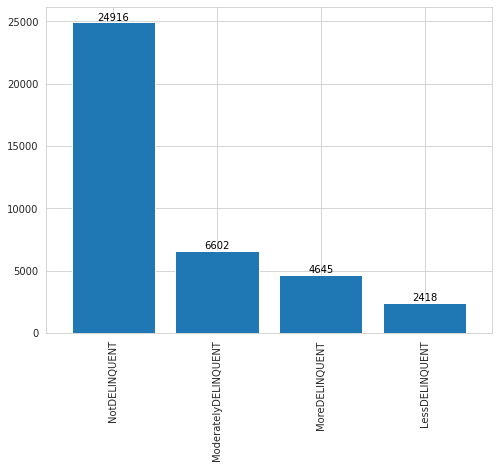

In [ ]:
cat_var_count('mths_since_last_delinq')

So as expected most of the customers are not delinquent, this is followed by customers who have not had a  delinquency of from 2 to 5 years, followed by customers who had a delinquency from the last two years and finally by the customers who have not had a delinquency from the last 5 years.

The next column that we will observe is 'open_acc'.<br>
__open_acc:__ The number of open credit lines in the borrower's credit file. This is a numerical variable.<br>Looking at a brief description of open_acc.

In [ ]:
data.open_acc.describe()

count    38581.000000
mean         9.315181
std          4.394089
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

Looking at the box plot for open_acc.

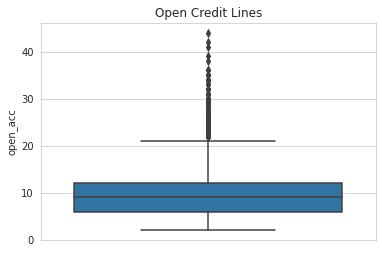

In [ ]:
bplot(data.open_acc,"Open Credit Lines")

So there are outliers.

In [ ]:
data.open_acc.describe(percentiles=np.arange(0,1,0.01))

count    38581.000000
mean         9.315181
std          4.394089
min          2.000000
0%           2.000000
1%           2.000000
2%           3.000000
3%           3.000000
4%           3.000000
5%           3.000000
6%           4.000000
7%           4.000000
8%           4.000000
9%           4.000000
10%          4.000000
11%          5.000000
12%          5.000000
13%          5.000000
14%          5.000000
15%          5.000000
16%          5.000000
17%          5.000000
18%          5.000000
19%          6.000000
20%          6.000000
21%          6.000000
22%          6.000000
23%          6.000000
24%          6.000000
25%          6.000000
26%          6.000000
27%          6.000000
28%          6.000000
29.0%        7.000000
30%          7.000000
31%          7.000000
32%          7.000000
33%          7.000000
34%          7.000000
35%          7.000000
36%          7.000000
37%          7.000000
38%          7.000000
39%          7.200000
40%          8.000000
41%       

From the quantile information and the above generated box plot, I fins that it is most appropriate if we cap the outliers in this column at 98% that is 20.

In [ ]:
data.loc[data['open_acc']>20,'open_acc']=20

Checking to see if the outliers are eliminated.

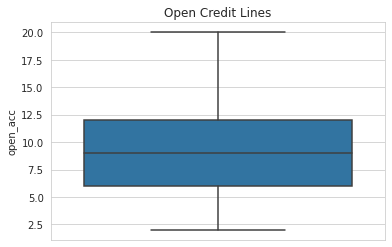

In [ ]:
bplot(data.open_acc,"Open Credit Lines")

The next variable that we will explore is revol_bal.<br>__revol_bal__:Total credit revolving balance.<br> Checking to see if there are missing variables.

In [ ]:
data.revol_bal.isnull().sum()

0

So there are no missing values in this column.

In [ ]:
data.revol_bal.describe()

count     38581.000000
mean      13444.697234
std       15900.797522
min           0.000000
25%        3743.000000
50%        8934.000000
75%       17137.000000
max      149588.000000
Name: revol_bal, dtype: float64

Looking at the box plot for open_acc.

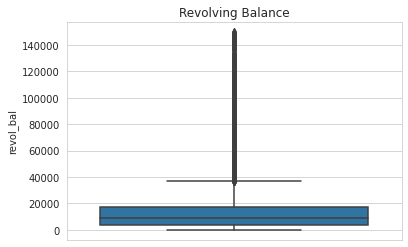

In [ ]:
bplot(data.revol_bal,"Revolving Balance")

So there are a lot of outliers that needs to be eliminated. Looking at the description of data quantile by quantile.

In [ ]:
data.revol_bal.describe(percentiles=np.arange(0,1,0.01))

count     38581.000000
mean      13444.697234
std       15900.797522
min           0.000000
0%            0.000000
1%            0.000000
2%            0.000000
3%           43.400000
4%          195.000000
5%          334.000000
6%          481.800000
7%          644.600000
8%          800.000000
9%          962.000000
10%        1135.000000
11%        1310.000000
12%        1476.000000
13%        1645.000000
14%        1825.200000
15%        1996.000000
16%        2176.800000
17%        2326.600000
18%        2490.000000
19%        2682.000000
20%        2857.000000
21%        3026.800000
22%        3199.000000
23%        3372.400000
24%        3558.200000
25%        3743.000000
26%        3927.800000
27%        4112.600000
28%        4309.400000
29.0%      4495.000000
30%        4688.000000
31%        4885.000000
32%        5063.600000
33%        5260.400000
34%        5444.000000
35%        5642.000000
36%        5833.800000
37%        6045.600000
38%        6254.000000
39%        

Based on the above box plot and the quantile to quantile description of this column we notice that it would be appropriate to cap the outliers at 93% that is 35251.80.

In [ ]:
data.loc[data['revol_bal']>35251.80,'revol_bal']=35251.80

Checking to see if the outliers are eliminated.

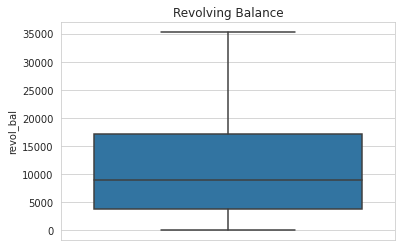

In [ ]:
bplot(data.revol_bal,"Revolving Balance")

So now all the outliers are eliminated.<br> The next column that we will handle is "revol_util".<br>__revol_util__:Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.<br> Checking for the missing values in this column.

In [ ]:
data.revol_util.isnull().sum()

47

In [ ]:
data.revol_util.unique()

array(['83.70%', '9.40%', '98.50%', ..., '49.63%', '0.04%', '7.28%'],
      dtype=object)

In [ ]:
data['revol_util']=data['revol_util'].apply(lambda x: pd.Series(str(x).split('%')))[0].astype(float).tolist()

In [ ]:
data['revol_util'].describe()

count    38534.000000
mean        49.005094
std         28.303894
min          0.000000
25%         25.700000
50%         49.500000
75%         72.500000
max         99.900000
Name: revol_util, dtype: float64

So there is not much difference between the mean and the median, so imputing the missing values with median just in case.

In [ ]:
data.loc[data['revol_util'].isnull(),'revol_util']=data['revol_util'].median()

Looking at the box plot for open_acc.

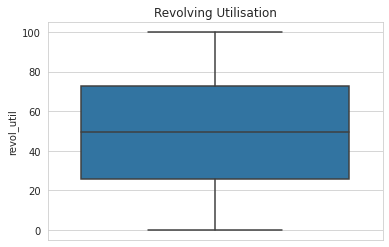

In [ ]:
bplot(data.revol_util,"Revolving Utilisation")

So there are no outliers that needs to be eliminated.

The next variable that needs to be examined is 'total_acc'.<br>
__total_acc__: The total number of credit lines currently in the borrower's credit file.

Looking for the missing variables in this column.

In [ ]:
data.total_acc.isnull().sum()

0

So there are no missing values in this column.<br> Let us look at the description of this column.

In [ ]:
data.total_acc.describe()

count    38581.000000
mean        22.115160
std         11.390989
min          2.000000
25%         14.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64

Looking at the box plot.

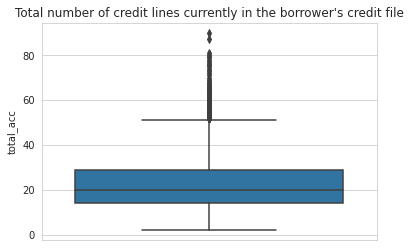

In [ ]:
bplot(data.total_acc,"Total number of credit lines currently in the borrower's credit file")

So there are outliers that needs to be eliminated. let us look at a detailed description of the data.

In [ ]:
data.total_acc.describe(np.arange(0,1,0.01))

count    38581.000000
mean        22.115160
std         11.390989
min          2.000000
0%           2.000000
1%           4.000000
2%           5.000000
3%           6.000000
4%           6.000000
5%           7.000000
6%           7.000000
7%           8.000000
8%           8.000000
9%           8.000000
10%          9.000000
11%          9.000000
12%         10.000000
13%         10.000000
14%         10.000000
15%         11.000000
16%         11.000000
17%         11.000000
18%         11.000000
19%         12.000000
20%         12.000000
21%         12.000000
22%         13.000000
23%         13.000000
24%         13.000000
25%         14.000000
26%         14.000000
27%         14.000000
28%         14.000000
29.0%       15.000000
30%         15.000000
31%         15.000000
32%         15.000000
33%         16.000000
34%         16.000000
35%         16.000000
36%         17.000000
37%         17.000000
38%         17.000000
39%         17.000000
40%         18.000000
41%       

From the above generated detailed description and the box plot I feel it would be appropriate to cap at 97% that is 47.

In [ ]:
data.loc[data['total_acc']>47,'total_acc']=47

Checking to see if the outliers have been eliminated.

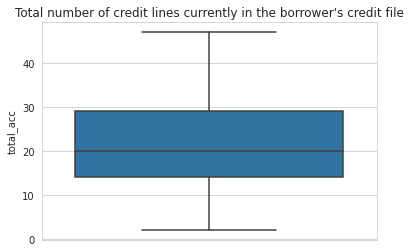

In [ ]:
bplot(data.total_acc,"Total number of credit lines currently in the borrower's credit file")

The next column that will be explored is "total_pymnt". <br>__total_pymnt__: Payments received to date for total amount funded.<br> Looking for the number of missing values in this column. 

In [ ]:
data.total_pymnt.isnull().sum()

0

So there are no missing values that needs to be dealt with. Lets look at a brief description of this column.

In [ ]:
data.total_pymnt.describe()

count    38581.000000
mean     12239.688393
std       9050.159582
min          0.000000
25%       5624.860000
50%      10023.010000
75%      16641.489990
max      58563.679930
Name: total_pymnt, dtype: float64

Looking at the box plot for this column.

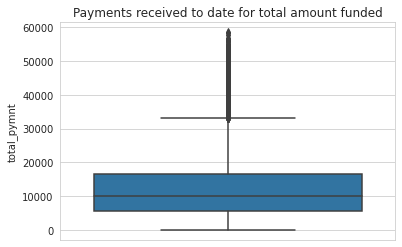

In [ ]:
bplot(data.total_pymnt,"Payments received to date for total amount funded")

So there are a lot of outliers that needs to be dealt with. Looking at the detailed quantile by quantile description of this column.

In [ ]:
data.total_pymnt.describe(percentiles=np.arange(0,1,0.01))

count    38581.000000
mean     12239.688393
std       9050.159582
min          0.000000
0%           0.000000
1%         806.700000
2%        1168.061806
3%        1450.072043
4%        1705.092000
5%        1954.660000
6%        2195.238310
7%        2381.418032
8%        2605.172000
9%        2814.550000
10%       3031.966800
11%       3231.194886
12%       3400.079726
13%       3558.514800
14%       3708.518343
15%       3930.004293
16%       4119.538409
17%       4321.308000
18%       4480.037656
19%       4671.061124
20%       4851.208773
21%       5026.485722
22%       5214.892886
23%       5386.974858
24%       5514.746295
25%       5624.860000
26%       5745.465036
27%       5867.804250
28%       6005.040268
29.0%     6142.799777
30%       6308.820225
31%       6484.276115
32%       6626.559502
33%       6754.928996
34%       6927.290111
35%       7084.832852
36%       7237.956176
37%       7396.991647
38%       7594.640302
39%       7780.125179
40%       7963.500000
41%       

From the above quantiles description and the box plot, it would be appropriate if we cap at 96%, that is 31675.629014

In [ ]:
data.loc[data['total_pymnt']>31675.629014,'total_pymnt']=31675.629014

Checking to see if the outliers are eliminated:

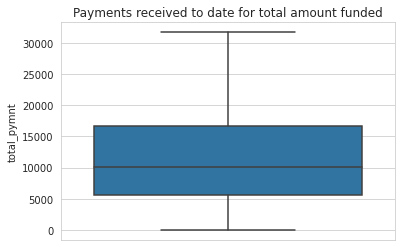

In [ ]:
bplot(data.total_pymnt,"Payments received to date for total amount funded")

So the outliers are eliminated.

So the next column that I will explore is 'total_pymnt_inv'.<br>__total_pymnt_inv__: Payments received to date for portion of total amount funded by investors.<br> Checking for the count of missing variables in this column.

In [ ]:
data.total_pymnt_inv.isnull().sum()

0

So there are no missing values in this column.

Looking at the box plot.

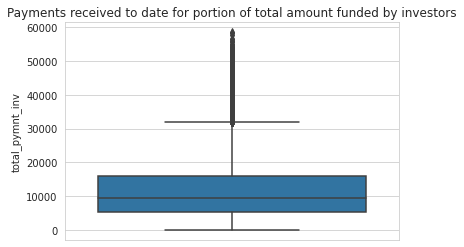

In [ ]:
bplot(data.total_pymnt_inv,"Payments received to date for portion of total amount funded by investors")

So there are outliers that needs to be capped.Let us look at a detailed description of the data.

In [ ]:
data.total_pymnt_inv.describe(np.arange(0,1,0.01))

count    38581.000000
mean     11640.769689
std       8955.851993
min          0.000000
0%           0.000000
1%         330.380000
2%         712.254000
3%        1017.538000
4%        1217.032000
5%        1450.320000
6%        1671.942000
7%        1890.482000
8%        2121.554000
9%        2312.534000
10%       2494.630000
11%       2700.534000
12%       2907.250000
13%       3080.494000
14%       3267.972000
15%       3435.960000
16%       3582.890000
17%       3739.142000
18%       3941.568000
19%       4138.504000
20%       4331.370000
21%       4480.058000
22%       4677.132000
23%       4851.230000
24%       5013.316000
25%       5176.600000
26%       5334.654000
27%       5477.852000
28%       5584.956000
29.0%     5712.574000
30%       5851.720000
31%       5989.562000
32%       6136.124000
33%       6301.576000
34%       6466.526000
35%       6610.380000
36%       6741.166000
37%       6919.002000
38%       7077.204000
39%       7228.546000
40%       7396.410000
41%       

From the above generated detailed description and the box plot I feel it would be appropriate to cap at 96% that is 33436.092000.

In [ ]:
data.loc[data['total_pymnt_inv']>31236.212,'total_pymnt_inv']=31236.212

Checking to see if the outliers have been eliminated.

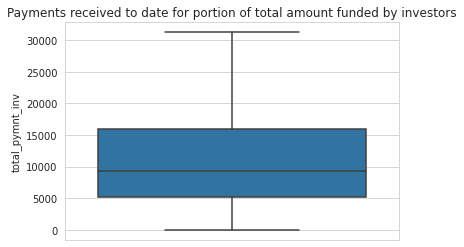

In [ ]:
bplot(data.total_pymnt_inv,"Payments received to date for portion of total amount funded by investors")

So all the outliers have been successfully eliminated.<br> The next variable that we need to study is 'total_rec_prncp'.<br>__total_rec_prncp__: Principal received to date.<br><br> Checking for the count of missing values in this variable.

In [ ]:
data.total_rec_prncp.isnull().sum()

0

So there are no missing values.<br> Let us look at the box plot for this variable.

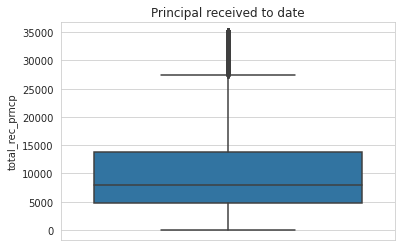

In [ ]:
bplot(data.total_rec_prncp,"Principal received to date")

So there are outliers that needs to be capped.Let us look at a detailed description of the data.

In [ ]:
data.total_rec_prncp.describe(np.arange(0,1,0.01))

count    38581.000000
mean      9862.698306
std       7072.441821
min          0.000000
0%           0.000000
1%         367.694000
2%         695.082000
3%        1000.000000
4%        1177.198000
5%        1387.040000
6%        1500.000000
7%        1769.590000
8%        2000.000000
9%        2000.000000
10%       2292.390000
11%       2478.622000
12%       2547.566000
13%       2800.100000
14%       3000.000000
15%       3000.000000
16%       3150.000000
17%       3375.000000
18%       3500.000000
19%       3687.424000
20%       4000.000000
21%       4000.000000
22%       4000.000000
23%       4200.000000
24%       4500.000000
25%       4750.000000
26%       4800.000000
27%       5000.000000
28%       5000.000000
29.0%     5000.000000
30%       5000.000000
31%       5100.000000
32%       5434.892000
33%       5600.000000
34%       5999.990000
35%       6000.000000
36%       6000.000000
37%       6000.000000
38%       6000.000000
39%       6325.000000
40%       6500.000000
41%       

From the above plot we find that it would be most appropriate if we could cap at 96% that 25000.00.

In [ ]:
data.loc[data['total_rec_prncp']>25000.00,'total_rec_prncp']=25000.00

Checking to see if the outliers have been eliminated.

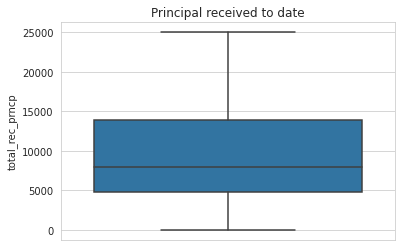

In [ ]:
bplot(data.total_rec_prncp,"Principal received to date")

So we find that most of the outliers have been eliminated. <br>The next variable that we will explore is total_rec_int.<br>__total_rec_int__: Interest received to date.<br> Let us look at the number of missing values in this column.

In [ ]:
data.total_rec_int.isnull().sum()

0

So there are no missing values.<br> Let us look at the box plot for this variable.

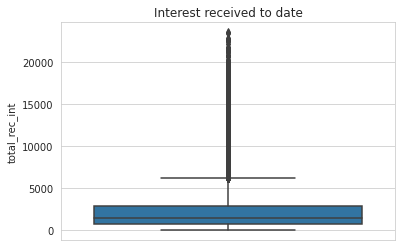

In [ ]:
bplot(data.total_rec_int,"Interest received to date")

So there are outliers that needs to be capped.Let us look at a detailed description of the data.

In [ ]:
data.total_rec_int.describe(np.arange(0,1,0.01))

count    38581.000000
mean      2280.620481
std       2613.352471
min          0.000000
0%           0.000000
1%          55.046000
2%          98.068000
3%         131.750000
4%         163.656000
5%         191.980000
6%         220.138000
7%         245.654000
8%         272.040000
9%         297.684000
10%        323.160000
11%        346.282000
12%        369.532000
13%        394.878000
14%        419.100000
15%        442.170000
16%        465.748000
17%        484.834000
18%        505.786000
19%        530.464000
20%        553.360000
21%        575.928000
22%        599.892000
23%        623.656000
24%        647.090000
25%        671.740000
26%        694.858000
27%        717.218000
28%        737.310000
29.0%      760.750000
30%        785.600000
31%        810.126000
32%        835.834000
33%        858.530000
34%        883.770000
35%        908.860000
36%        933.274000
37%        959.736000
38%        988.454000
39%       1015.716000
40%       1042.830000
41%       

From the above box plot I find that it would be appropriate if we could cap the outliers at 92% that is 6101.782.

In [ ]:
data.loc[data['total_rec_int']>6101.782,'total_rec_int']=6101.782

Checking to see if the outliers have been eliminated.

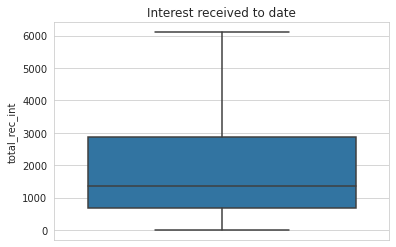

In [ ]:
bplot(data.total_rec_int,"Interest received to date")

So we have eliminated all the outliers in this column.<br> The next variable that we will explore is 'last_pymnt_d'.<br>__last_pymnt_d__: Last month payment was received.<br> Let us look at the number of missing values in this column.

In [ ]:
data.last_pymnt_d.isnull().sum()

66

Removing the rows that have null values.

In [ ]:
print('The number of rows before removing rows that have null values in last_pymnt_d is %d'%len(data.index))
data=data[data.last_pymnt_d.notnull()]
print('The number of rows after removing rows that have null values in last_pymnt_d is %d'%len(data.index))

The number of rows before removing rows that have null values in last_pymnt_d is 38581
The number of rows after removing rows that have null values in last_pymnt_d is 38515


Checking to see if the data type of the column is of string type, if so, we shall convert it to a data time object.

In [ ]:
type(data.last_pymnt_d[0])

str

In [ ]:
data.last_pymnt_d=pd.to_datetime(data.last_pymnt_d.str.upper(), format='%b-%y', yearfirst=False)

In [ ]:
print("The earliest year in which the last payment was made is:",min(data.last_pymnt_d.dt.year))
print("The latest year in which the last payment was made is:",max(data.last_pymnt_d.dt.year))

The earliest year in which the last payment was made is: 2008
The latest year in which the last payment was made is: 2016


We know that the loans were issued in the time frame  1/6/2007  to 1/12/2011, having said that, it makes sense that the years corresponding to the last payment day is in between the years 2008 to 2016.

Observing the next variable 'last_pymnt_amnt'.<br> __last_pymnt_amnt__: Last total payment amount received.<br> Let us look at the number of missing values in this column.

In [ ]:
data.last_pymnt_amnt.isnull().sum()

0

So there are no missing values.<br> Let us look at the box plot for this variable.

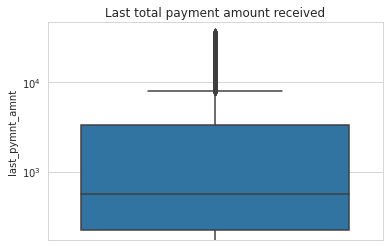

In [ ]:
plt.yscale('log')
bplot(data.last_pymnt_amnt,"Last total payment amount received")

So there are outliers that needs to be capped.Let us look at a detailed description of the data.

In [ ]:
data.last_pymnt_amnt.describe(np.arange(0,1,0.01))

count    38515.000000
mean      2707.031279
std       4470.278296
min          0.000000
0%           0.000000
1%           9.185600
2%          18.255600
3%          28.000000
4%          35.655600
5%          45.844000
6%          55.952000
7%          67.419800
8%          77.421200
9%          88.475200
10%         98.886000
11%        106.292400
12%        114.833600
13%        123.948200
14%        134.058800
15%        144.163000
16%        152.962400
17%        161.080400
18%        168.100400
19%        174.369600
20%        181.578000
21%        189.889400
22%        198.441600
23%        205.892200
24%        214.993600
25%        223.135000
26%        232.110000
27%        242.525600
28%        251.586800
29.0%      260.930000
30%        271.140000
31%        280.820000
32%        290.759600
33%        301.540000
34%        313.003200
35%        323.728000
36%        333.600000
37%        343.779000
38%        353.516400
39%        365.029000
40%        375.910000
41%       

From the above box plot I find that it would be appropriate if we could cap the outliers at 8000.00

In [ ]:
data.loc[data['last_pymnt_amnt']>8000.00,'last_pymnt_amnt']=8000.00

Checking to see if the outliers have been eliminated.

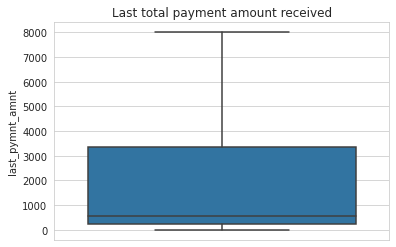

In [ ]:

bplot(data.last_pymnt_amnt,"Last total payment amount received")

So we have eliminated all the outliers. The next variable that we will deal with is 'last_credit_pull_d'.<br>__last_credit_pull_d__: The most recent month LC pulled credit for this loan.<br> Let us look at the number of missing values in this column.

In [ ]:
data.last_credit_pull_d.isnull().sum()

2

Removing these two rows.

In [ ]:
print('The number of rows before removing rows that have null values in last_credit_pull_d is %d'%len(data.index))
data=data[data['last_credit_pull_d'].notnull()]
print('The number of rows after removing rows that have null values in last_credit_pull_d is %d'%len(data.index))

The number of rows before removing rows that have null values in last_credit_pull_d is 38515
The number of rows after removing rows that have null values in last_credit_pull_d is 38513


Checking to see if the data type of the column is of string type, if so, we shall convert it to a data time object.

In [ ]:
data.last_credit_pull_d=pd.to_datetime(data.last_credit_pull_d.str.upper(), format='%b-%y', yearfirst=False)

In [ ]:
print("The earliest year in which LC pulled credit for this loan:",min(data.last_credit_pull_d.dt.year))
print("The latest year in which LC pulled credit for this loan:",max(data.last_credit_pull_d.dt.year))

The earliest year in which LC pulled credit for this loan: 2007
The latest year in which LC pulled credit for this loan: 2016


We know that the loans were issued in the time frame  1/6/2007  to 1/12/2011, having said that, it makes sense that the years corresponding to the most recent month LC pulled credit for this loan is in between the years 2007 to 2016.<br> The next variable that we will explore is 'chargeoff_within_12_mths'.<br>__chargeoff_within_12_mths__: Number of charge-offs within 12 months. LEt us look at the number of missing values in this column.

In [ ]:
data.chargeoff_within_12_mths.isnull().sum()

56

Let us look at the number of unique values in this column.

In [ ]:
np.unique(data['chargeoff_within_12_mths'])

array([ 0., nan])

Since the above columns have only NAN and 0 as unique values, we shall drop them.

In [ ]:
print("The number of columns before dropping this column is %d",len(data.columns))
data=data.drop(columns='chargeoff_within_12_mths')
print("The number of columns after dropping this column is %d",len(data.columns))

The number of columns before dropping this column is %d 33
The number of columns after dropping this column is %d 32


The next variable that we shall observe is "tax_liens".<br> __tax_liens__: Number of tax liens. Let us look at the unique values in this column.

In [ ]:
np.unique(data['tax_liens'])

array([ 0., nan])

Since the above columns have only NAN and 0 as unique values, we shall drop them.

In [ ]:
print("The number of columns before dropping this column is %d",len(data.columns))
data=data.drop(columns='tax_liens')
print("The number of columns after dropping this column is %d",len(data.columns))

The number of columns before dropping this column is %d 32
The number of columns after dropping this column is %d 31


Now that we have completely cleaned the data set and explored each variable, let us look at the final description of the dataframe that we are left with.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38513 entries, 1077501_1296599 to 87023_86999
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   loan_amnt               38513 non-null  int64         
 1   funded_amnt             38513 non-null  int64         
 2   funded_amnt_inv         38513 non-null  float64       
 3   term                    38513 non-null  object        
 4   int_rate                38513 non-null  float64       
 5   installment             38513 non-null  float64       
 6   grade                   38513 non-null  object        
 7   sub_grade               38513 non-null  object        
 8   emp_length              38513 non-null  object        
 9   home_ownership          38513 non-null  object        
 10  annual_inc              38513 non-null  object        
 11  verification_status     38513 non-null  object        
 12  issue_d                 38513 n

In [ ]:
data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,dti,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt
count,38513.000000,38513.000000,38513.000000,38513.000000,38513.000000,38513.000000,38513.000000,38513.000000,38513.000000,38513.000000,38513.000000,38513.000000,38513.000000,38513.000000,38513.000000,38513.000000
mean,11039.237920,10886.684366,10311.870311,12.039108,322.683288,13.327301,0.869680,9.251448,11860.550697,49.006065,21.909122,11976.616352,11388.857129,9706.480953,2028.844255,2121.748199
std,6806.176503,6809.646586,6716.679902,3.689254,197.037823,6.665054,1.069424,4.174337,10238.347320,28.287570,10.787929,8209.536829,8145.483298,6580.349452,1792.546874,2726.624206
min,500.000000,500.000000,0.000000,5.420000,15.690000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,33.730000,0.000000,0.000000,6.220000,0.000000
25%,5500.000000,5500.000000,5000.000000,9.320000,168.450000,8.210000,0.000000,6.000000,3749.000000,25.700000,14.000000,5633.049926,5196.310000,4791.090000,674.940000,223.150000
50%,10000.000000,9950.000000,9000.000000,11.860000,282.960000,13.420000,1.000000,9.000000,8942.000000,49.500000,20.000000,10040.458440,9394.920000,8000.000000,1371.020000,556.480000
75%,15000.000000,15000.000000,14425.000000,14.590000,434.310000,18.590000,1.000000,12.000000,17149.000000,72.500000,29.000000,16651.646830,15923.030000,13907.170000,2861.670000,3349.870000
max,25484.000000,28000.000000,27013.537424,20.990000,805.080000,29.990000,8.000000,20.000000,35251.800000,99.900000,47.000000,31675.629014,31236.212000,25000.000000,6101.782000,8000.000000


## Bivariate Analysis:

### Let us look if the loan amount taken by the customer has any impact on the loan status.

In [ ]:
df_by_lStatus=data.groupby('loan_status')
df_by_lStatus['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5322.0,11911.483089,7229.016186,900.0,6000.0,10000.0,17000.0,25484.0
Current,1096.0,16175.589416,7015.786474,1000.0,12000.0,16000.0,23287.5,25484.0
Fully Paid,32095.0,10719.202711,6641.883747,500.0,5400.0,9600.0,15000.0,25484.0


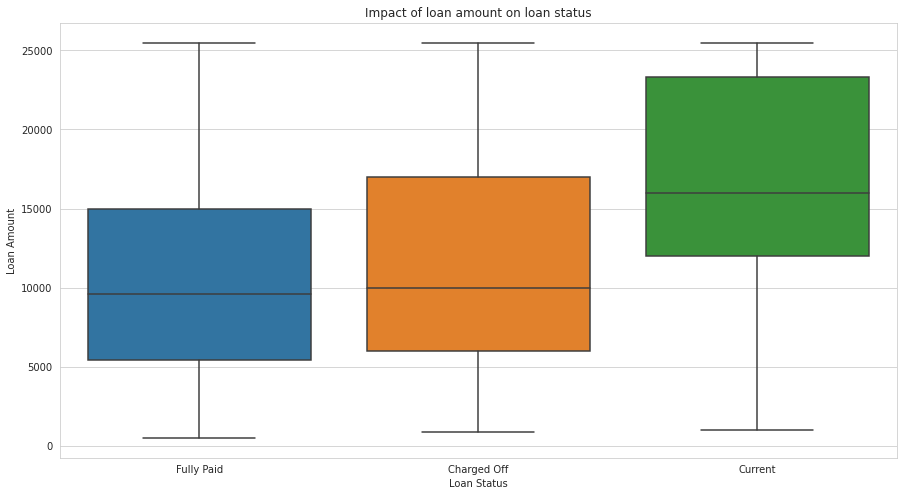

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='loan_status',y='loan_amnt',data=data)
plt.title('Impact of loan amount on loan status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

From the above given plot we determine that the median of the charged off loan amount is slightly higher than the  fully paid loans. Even at the 25th percentile of the distribution of charged off loans is higher than that of fully paid loans,__this means that the loan amount for smaller loans where much more for the charged off loans than the fully paid ones__.  The 75th percentile of the charged off loans is much higher than the fully paid ones,__this means that the loan amount of big loans were much more in the case of charged off loans than the fully paid ones__.The distribution for fully paid loans is equally balanced and the distribution for charged off loans is positively skewed, __which means more loans of higher value was provided.For the current loans we observe that, smaller loans and larger loans are provided for higher as compared to the charged off or fully paid loans,also a significantly larger number higher amount loans are provided than the smaller amount loans. This needs to be investigated.__  

### Let us look if the loan term has any impact on the loan status.

In [ ]:
df=pd.crosstab(data.term, data.loan_status)
df=df.reset_index()
df

loan_status,term,Charged Off,Current,Fully Paid
0,36 months,3018,0,25173
1,60 months,2304,1096,6922


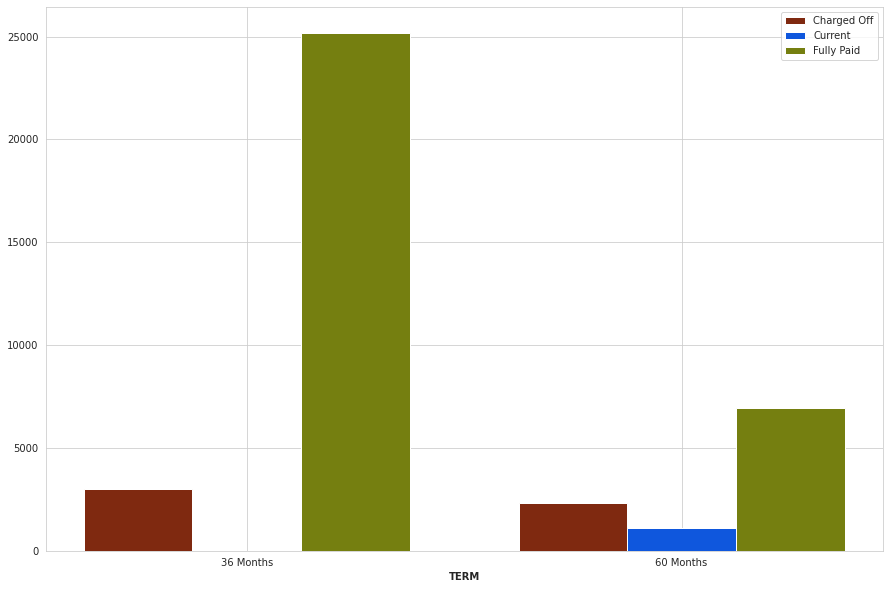

In [ ]:
plt.figure(figsize=(15,10))
# set width of bar
barWidth = 0.25
# set height of bar
bars1 = df['Charged Off']
bars2 = df['Current']
bars3 = df['Fully Paid']
# Set position of bar on X axis
r1 = np.arange(len(bars3))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
plt.bar(r1, bars1, color='#7f2910', width=barWidth, edgecolor='white', label='Charged Off')
plt.bar(r2, bars2, color='#0f57dd', width=barWidth, edgecolor='white', label='Current')
plt.bar(r3, bars3, color='#757f10', width=barWidth, edgecolor='white', label='Fully Paid')
# Add xticks on the middle of the group bars
plt.xlabel('TERM', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['36 Months','60 Months'])
# Create legend & Show graphic
plt.legend()
plt.show()

The number of charge off of 36 months is slightly higher than the 60 months loans, this could be a reason why the 36 month loan is currently discontinued. But it is wise to restart the 36 month term loan as the number of fully paid loans are staggeringly higher than the charged off ones.

### Let us look if the interest rate has any impact on the loan status.

In [ ]:
df_by_lStatus['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5322.0,13.852170,3.583239,5.42,11.385,13.61,16.45,20.99
Current,1096.0,15.052920,3.479543,6.00,11.990,14.65,17.99,20.99
Fully Paid,32095.0,11.635549,3.573852,5.42,8.590,11.49,13.99,20.99


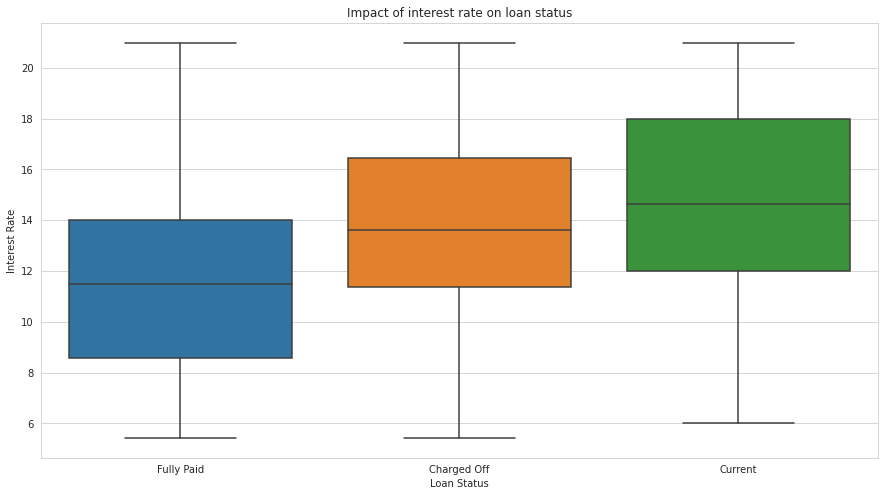

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='loan_status',y='int_rate',data=data)
plt.title('Impact of interest rate on loan status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.show()

Fully paid and charged off loans being historical in nature, the median of their rate of is lesser when compared to the fully paid ones. But the median of the fully paid loans are significantly lower than the charged off ones. Also the distribution of the interest rate in the case of fully paid loans is not skewed, but it is positively skewed in in the case of charged of loans so it better to have a balance of high interest and low interest loans. __In the case of current again it is positively skewed meaning more loans are being given of higher interest rate as compared to ones with a lower interest rate which is not advisable.__

### The effect of installments on loan status.

In [ ]:
df_by_lStatus['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5322.0,335.941516,204.029604,22.79,172.34,298.625,463.6150,805.08
Current,1096.0,394.887628,195.933404,21.74,260.85,369.555,520.2325,805.08
Fully Paid,32095.0,318.019128,195.313267,15.69,166.50,277.570,423.4600,805.08


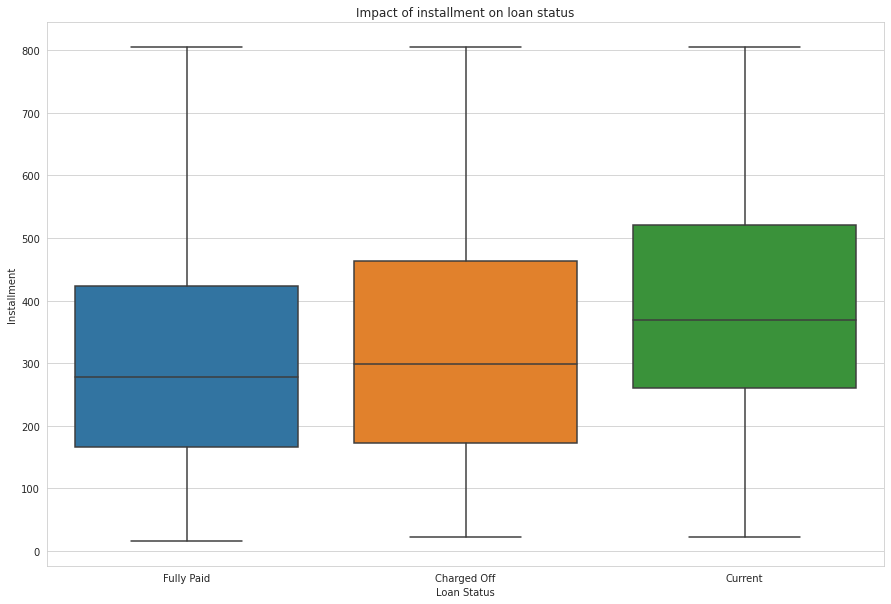

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='loan_status',y='installment',data=data)
plt.title('Impact of installment on loan status')
plt.xlabel('Loan Status')
plt.ylabel('Installment')
plt.show()

We notice that the median of installments of the fully paid loans are lesser than the charged off loans. Also the installment for the current loans are significantly higher than the fully paid loans. 

### Let us look if the grade of loan has any impact on the loan status.

In [ ]:
df_grade=pd.crosstab(data.grade, data.loan_status)
df_grade=df_grade.reset_index()
df_grade

loan_status,grade,Charged Off,Current,Fully Paid
0,A,551,35,9084
1,B,1338,326,9992
2,C,1263,256,6371
3,D,1070,216,3889
4,E,691,175,1916
5,F,311,71,645
6,G,98,17,198


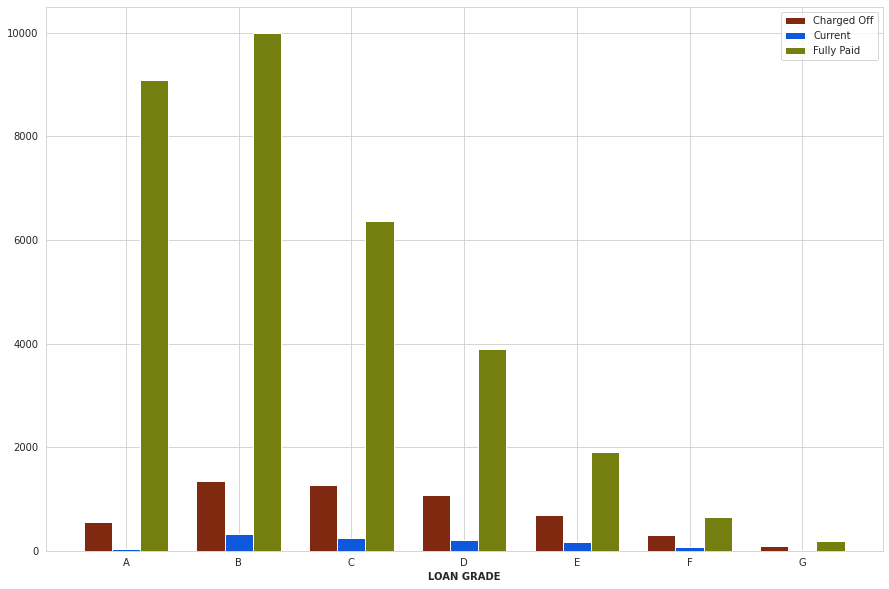

In [ ]:
plt.figure(figsize=(15,10))
# set width of bar
barWidth = 0.25
# set height of bar
bars1 = df_grade['Charged Off']
bars2 = df_grade['Current']
bars3 = df_grade['Fully Paid']
# Set position of bar on X axis
r1 = np.arange(len(bars3))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
plt.bar(r1, bars1, color='#7f2910', width=barWidth, edgecolor='white', label='Charged Off')
plt.bar(r2, bars2, color='#0f57dd', width=barWidth, edgecolor='white', label='Current')
plt.bar(r3, bars3, color='#757f10', width=barWidth, edgecolor='white', label='Fully Paid')

# Add xticks on the middle of the group bars
plt.xlabel('LOAN GRADE', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars3))], ['A','B','C','D','E','F','G'])
# Create legend & Show graphic
plt.legend()
plt.show()

Even though the number of loans fully paid in grade B is the second largest there are barely any loans given of thus grade. But here are significant loans of grade D and E where the fully paid number of loans is far lesser.

### Let us look if the length of employment of a customer has any impact on the loan status.

In [ ]:
df_emp_length=pd.crosstab(data.emp_length, data.loan_status)
df_emp_length=df_emp_length.reset_index()
df_emp_length

loan_status,emp_length,Charged Off,Current,Fully Paid
0,HIGH,617,138,3745
1,LOW,1736,255,11033
2,MODERATE,1206,243,7464
3,VERY HIGH,1763,460,9853


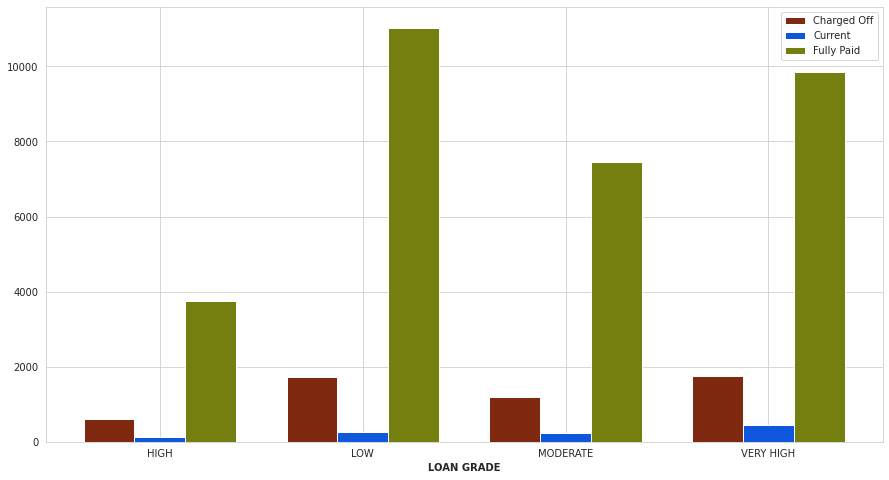

In [ ]:
plt.figure(figsize=(15,8))
# set width of bar
barWidth = 0.25
# set height of bar
bars1 = df_emp_length['Charged Off']
bars2 = df_emp_length['Current']
bars3 = df_emp_length['Fully Paid']
# Set position of bar on X axis
r1 = np.arange(len(bars3))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
plt.bar(r1, bars1, color='#7f2910', width=barWidth, edgecolor='white', label='Charged Off')
plt.bar(r2, bars2, color='#0f57dd', width=barWidth, edgecolor='white', label='Current')
plt.bar(r3, bars3, color='#757f10', width=barWidth, edgecolor='white', label='Fully Paid')

# Add xticks on the middle of the group bars
plt.xlabel('LOAN GRADE', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars3))], ['HIGH','LOW','MODERATE','VERY HIGH'])
# Create legend & Show graphic
plt.legend()
plt.show()

| emp_length | % ChargedOff | % Current |
|------------|--------------|-----------|
| HIGH       | 11.59        | 12.59     |
| LOW        | 32.62        | 23.26     |
| MODERATE   | 22.66        | 22.17     |
| VERY HIGH  | 33.12        | 41.97     |
From the above table and plot we infer that __about 42% of current loans are given for customers who have more than 10 years of experience even if they account to 33.12% of the total charged off loans. More preference should be given for customers who have a high or moderate length of experience as compared to the ones who have lower or very high length of experience.__

### Let us look if home ownership of a customer has any impact on the loan status.

In [ ]:
df_home_ownership=pd.crosstab(data.home_ownership, data.loan_status)
df_home_ownership=df_home_ownership.reset_index()

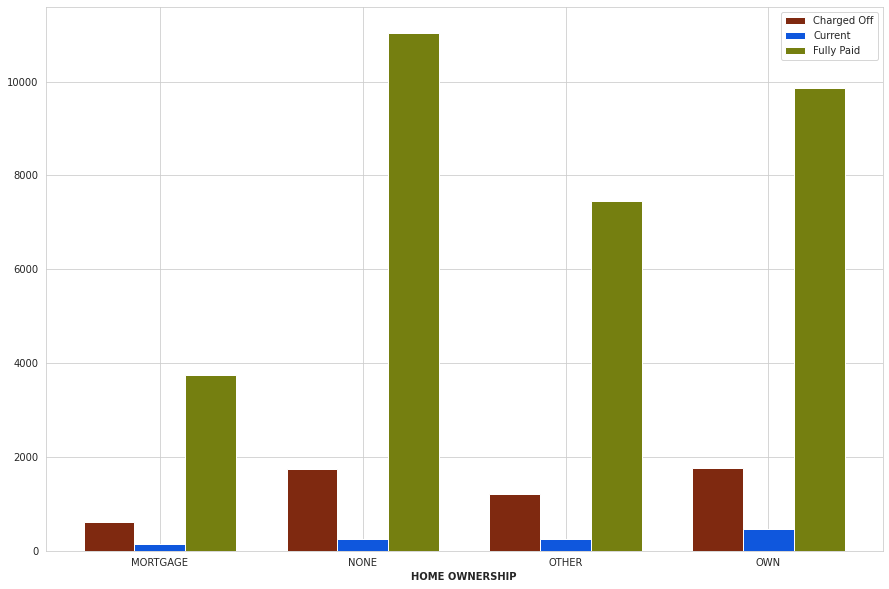

In [ ]:
plt.figure(figsize=(15,10))
# set width of bar
barWidth = 0.25
# set height of bar
bars1 = df_emp_length['Charged Off']
bars2 = df_emp_length['Current']
bars3 = df_emp_length['Fully Paid']
# Set position of bar on X axis
r1 = np.arange(len(bars3))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
plt.bar(r1, bars1, color='#7f2910', width=barWidth, edgecolor='white', label='Charged Off')
plt.bar(r2, bars2, color='#0f57dd', width=barWidth, edgecolor='white', label='Current')
plt.bar(r3, bars3, color='#757f10', width=barWidth, edgecolor='white', label='Fully Paid')

# Add xticks on the middle of the group bars
plt.xlabel('HOME OWNERSHIP', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars3))], df_home_ownership.home_ownership.tolist())
# Create legend & Show graphic
plt.legend()
plt.show()

| home_ownership | Charged Off | Current | Fully Paid | %Charged OFF | %Current    |
|----------------|-------------|---------|------------|--------------|-------------|
| MORTGAGE       | 2224        | 615     | 14324      | 41.7888012   | 56.11313869 |
| NONE           | 0           | 0       | 3          | 0            | 0           |
| OTHER          | 18          | 0       | 79         | 0.338218715  | 0           |
| OWN            | 395         | 71      | 2364       | 7.422021796  | 6.47810219  |
| RENT           | 2685        | 410     | 15325      | 50.45095829  | 37.40875912 |

From the above table we infer that 50.45% of charged off loans are done by people who stay in a rented home yet 37.41% of the current loans are given such customers and 41.78% of the charged of loans are by people who have a mortgage yet 56% percent of the current loans are given to such customers. Surprisingly lesser number of loans are provided for people who own a house even though the charge off by such customers only account for 7.4% of the charged off loans. __So first preference should be given for customers who have a own house over people who have a rented accommodation or a mortgage.__

### Let us look if annual income of a customer has any impact on the loan status.

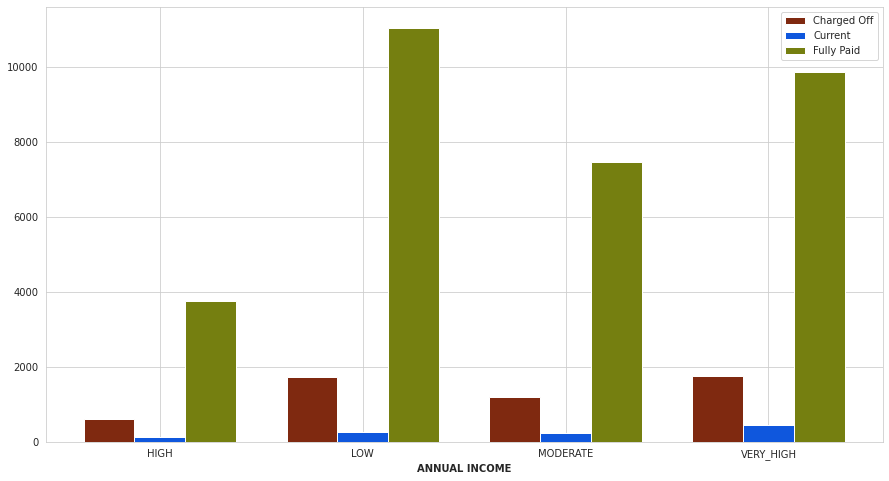

In [ ]:
df_annual_income=pd.crosstab(data.annual_inc, data.loan_status)
df_annual_income=df_annual_income.reset_index()

plt.figure(figsize=(15,8))
# set width of bar
barWidth = 0.25
# set height of bar
bars1 = df_emp_length['Charged Off']
bars2 = df_emp_length['Current']
bars3 = df_emp_length['Fully Paid']
# Set position of bar on X axis
r1 = np.arange(len(bars3))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
plt.bar(r1, bars1, color='#7f2910', width=barWidth, edgecolor='white', label='Charged Off')
plt.bar(r2, bars2, color='#0f57dd', width=barWidth, edgecolor='white', label='Current')
plt.bar(r3, bars3, color='#757f10', width=barWidth, edgecolor='white', label='Fully Paid')

# Add xticks on the middle of the group bars
plt.xlabel('ANNUAL INCOME', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars3))], df_annual_income.annual_inc.tolist())
# Create legend & Show graphic
plt.legend()
plt.show()

| annual_inc | Charged Off | Current | Fully Paid | %ChargedOff | %Current    |
|------------|-------------|---------|------------|-------------|-------------|
| HIGH       | 858         | 274     | 6582       | 16.12175874 | 25          |
| LOW        | 1863        | 223     | 9101       | 35.00563698 | 20.34671533 |
| MODERATE   | 2189        | 458     | 13123      | 41.1311537  | 41.78832117 |
| VERY_HIGH  | 412         | 141     | 3289       | 7.741450582 | 12.8649635  |
From the above table we can infer that although the bank is using the right strategy to provide loans in terms of annual income. __I feel that it would be better if they could provide a little more loans to HIGH annual income category and reduce a loans customers with MODERATE annual income by a little amount as the charge off rate is 41.13% for customers with moderate annual income.__

### Let us look if verification status has any impact on the loan status.

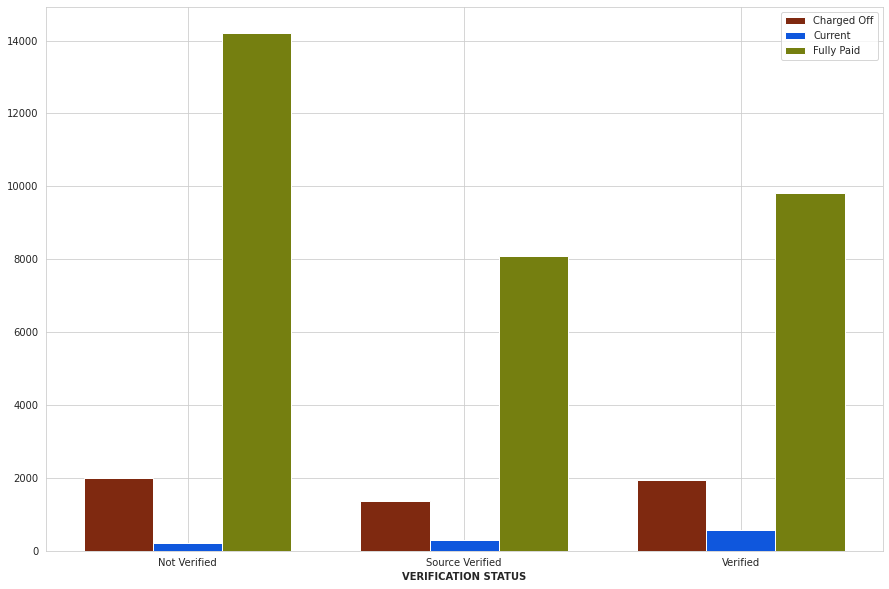

In [ ]:
df_verification_status=pd.crosstab(data.verification_status, data.loan_status)
df_verification_status=df_verification_status.reset_index()

plt.figure(figsize=(15,10))
# set width of bar
barWidth = 0.25
# set height of bar
bars1 = df_verification_status['Charged Off']
bars2 = df_verification_status['Current']
bars3 = df_verification_status['Fully Paid']
# Set position of bar on X axis
r1 = np.arange(len(bars3))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
plt.bar(r1, bars1, color='#7f2910', width=barWidth, edgecolor='white', label='Charged Off')
plt.bar(r2, bars2, color='#0f57dd', width=barWidth, edgecolor='white', label='Current')
plt.bar(r3, bars3, color='#757f10', width=barWidth, edgecolor='white', label='Fully Paid')

# Add xticks on the middle of the group bars
plt.xlabel('VERIFICATION STATUS', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars3))], df_verification_status.verification_status.tolist())
# Create legend & Show graphic
plt.legend()
plt.show()

| loan_status | verification_status | Charged Off | Current | Fully Paid | Percentage  | %Charged Off | %Current    |
|-------------|---------------------|-------------|---------|------------|-------------|--------------|-------------|
| 0           | Not Verified        | 2011        | 220     | 14205      | 12.23533706 | 37.78654641  | 20.0729927  |
| 1           | Source Verified     | 1380        | 295     | 8086       | 14.13789571 | 25.93010147  | 26.91605839 |
| 2           | Verified            | 1931        | 581     | 9804       | 15.67879182 | 36.28335212  | 53.01094891 |


From the above table we notice that the __percentage of charge off is significantly lower when the verification status is source verified. The verification method implemented for the verified customers is ineffective as the percentage of charged off loans is equal to the percentage of charged off loans when the customers is not source verified.__

### Let us look if the purpose for which loan has been taken has any impact on the loan status.

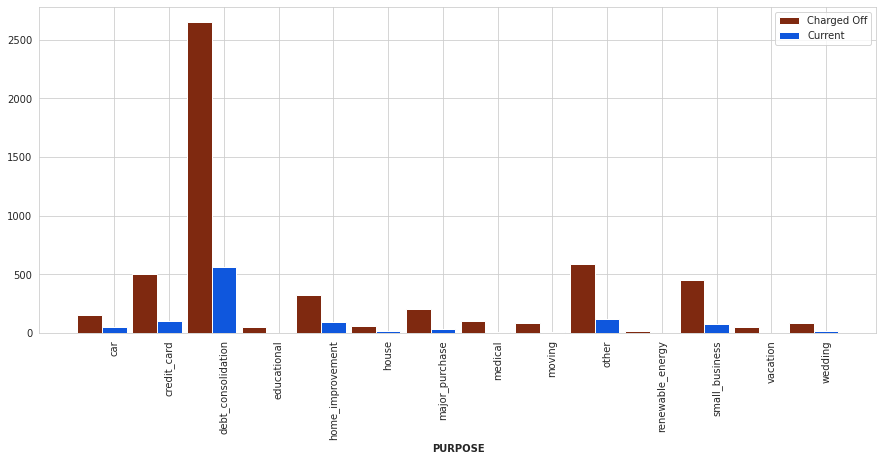

In [ ]:
df_purpose=pd.crosstab(data[(data['loan_status']=='Charged Off') | (data['loan_status']=='Current')].purpose, data[(data['loan_status']=='Charged Off') | (data['loan_status']=='Current')].loan_status)
df_purpose=df_purpose.reset_index()
plt.figure(figsize=(15,6))
# set width of bar
barWidth = 0.45
# set height of bar
bars1 = df_purpose['Charged Off']
bars2 = df_purpose['Current']
# Set position of bar on X axis
r1 = np.arange(len(bars2))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, color='#7f2910', width=barWidth, edgecolor='white', label='Charged Off')
plt.bar(r2, bars2, color='#0f57dd', width=barWidth, edgecolor='white', label='Current')

# Add xticks on the middle of the group bars
plt.xlabel('PURPOSE', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars2))], df_purpose.purpose.tolist())
# Create legend & Show graphic
plt.legend()
plt.xticks(rotation=90)
plt.show()

From the above plot we notice that __there is staggeringly high number of loans taken for the purpose of debt consolidation that has been charged off, yet the highest number of current loans are given for this purpose.__

### Looking at the trend of charged off loans over the years.

In [ ]:
data_charged_off=data[(data['loan_status']=='Charged Off')].groupby('issue_d')['loan_status'].agg('count')
data_charged_off=pd.DataFrame(data_charged_off)
data_charged_off=data_charged_off.reset_index()
data_paid=data[(data['loan_status']=='Fully Paid')].groupby('issue_d')['loan_status'].agg('count')
data_paid=pd.DataFrame(data_paid)
data_paid=data_paid.reset_index()

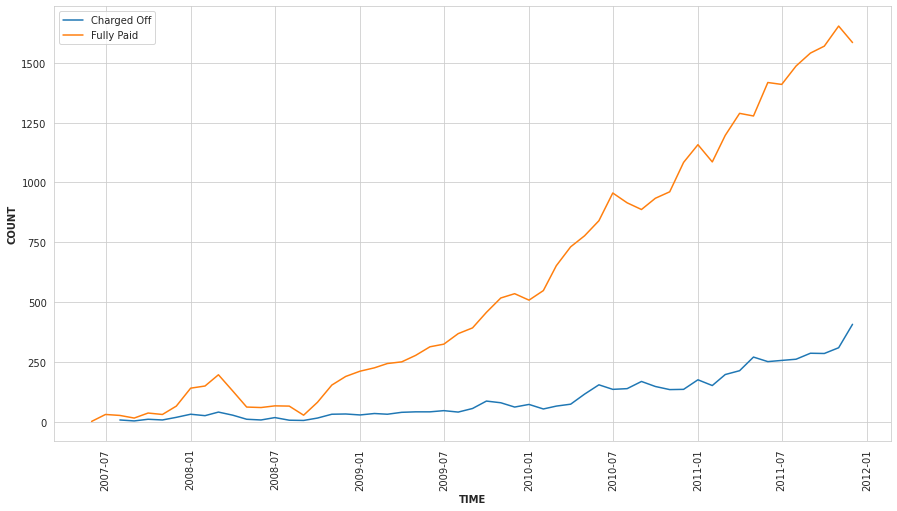

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(data_charged_off['issue_d'],data_charged_off['loan_status'],label='Charged Off')
plt.plot(data_paid['issue_d'],data_paid['loan_status'],label='Fully Paid')
# Add xticks on the middle of the group bars
plt.xlabel('TIME', fontweight='bold')
plt.ylabel('COUNT', fontweight='bold')
# Create legend & Show graphic
plt.legend()
plt.xticks(rotation=90)
plt.show()

__The number of loans that have been paid off has been exponentially increased post September 2009. Unfortunately so have the number of charged off loans, while looking at the impact of loan amount on loan status we had found that most of the loans which are currently active and charged off were usually provided for higher amounts, this could cause significant revenue loss.__

### Let us see if people from a particular state have a tendency to default loans:

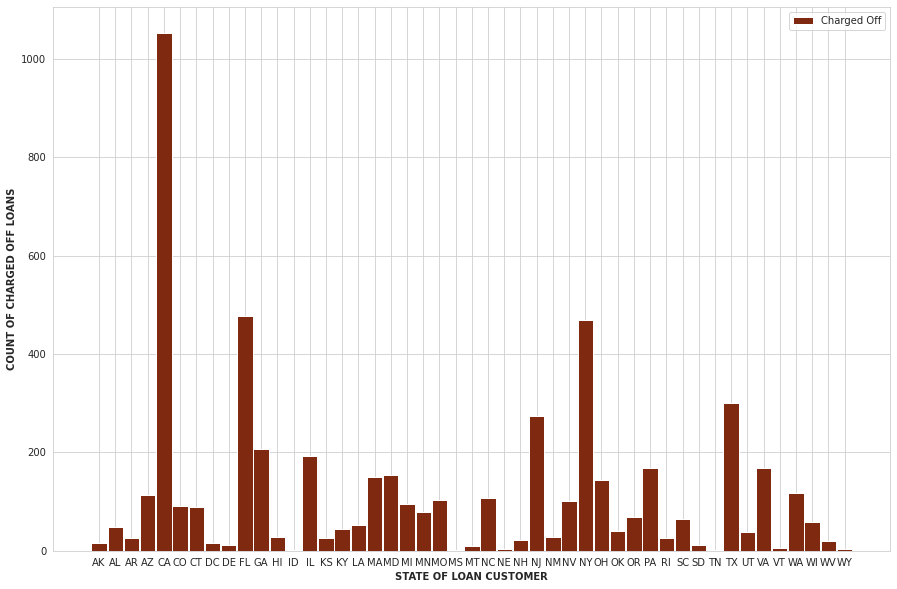

In [ ]:
df_addr_state=pd.crosstab(data[data['loan_status']=='Charged Off'].addr_state, data.loan_status)
df_addr_state=df_addr_state.reset_index()

plt.figure(figsize=(15,10))
# set width of bar
barWidth = 0.95
# set height of bar
bars1 = df_addr_state['Charged Off']

# Set position of bar on X axis
r1 = np.arange(len(bars1))

plt.bar(r1, bars1, color='#7f2910', width=barWidth, edgecolor='white', label='Charged Off')

# Add xticks on the middle of the group bars
plt.xlabel('STATE OF LOAN CUSTOMER', fontweight='bold')
plt.ylabel('COUNT OF CHARGED OFF LOANS', fontweight='bold')
plt.xticks(r1, df_addr_state.addr_state.tolist())
# Create legend & Show graphic
plt.legend()
plt.show()

So from the above plot we conclude that the highest number of charged off loans are done by customers who belong to California, followed by New York and Florida, followed by Texas. 

### Let us explore if the months since last delinquency has an effect on loan status.

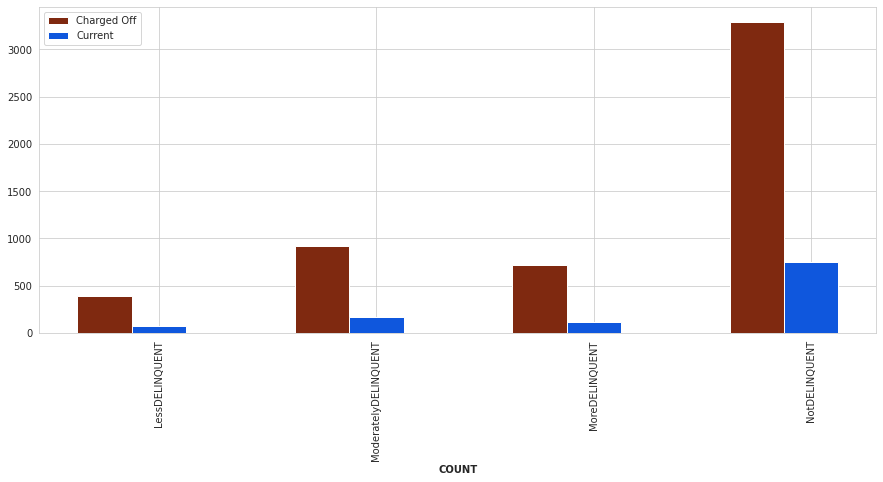

In [ ]:
df_mths_since_last_delinq=pd.crosstab(data[(data['loan_status']=='Charged Off') | (data['loan_status']=='Current')].mths_since_last_delinq, data[(data['loan_status']=='Charged Off') | (data['loan_status']=='Current')].loan_status)
df_mths_since_last_delinq=df_mths_since_last_delinq.reset_index()
plt.figure(figsize=(15,6))
# set width of bar
barWidth = 0.25
# set height of bar
bars1 = df_mths_since_last_delinq['Charged Off']
bars2 = df_mths_since_last_delinq['Current']
# Set position of bar on X axis
r1 = np.arange(len(bars2))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
plt.bar(r1, bars1, color='#7f2910', width=barWidth, edgecolor='white', label='Charged Off')
plt.bar(r2, bars2, color='#0f57dd', width=barWidth, edgecolor='white', label='Current')


# Add xticks on the middle of the group bars
plt.xlabel('MONTHS SINCE LAST DELINQUENCY OF LOAN CUSTOMERS', fontweight='bold')
plt.xlabel('COUNT', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], df_mths_since_last_delinq.mths_since_last_delinq.tolist())
# Create legend & Show graphic
plt.legend()
plt.xticks(rotation=90)
plt.show()

The strategy of the banks in terms of months since last delinquency is right, although the LessDELINQUENT customers
should be given preference over the ModeratelyDELINQUENT and MoreDELINQUENT customers.

### Let us explore the correlation amongst the numerical variables.

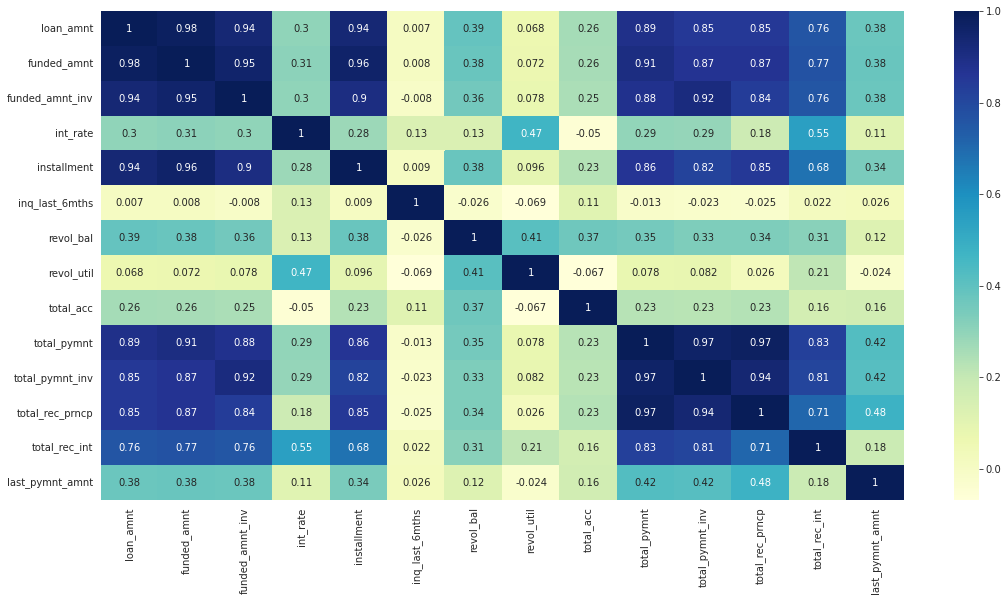

In [ ]:
#Let us first make a list of numerical columns.
numerical_cols=['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment',
                 'inq_last_6mths','revol_bal','revol_util','total_acc','total_pymnt',
                 'total_pymnt_inv','total_rec_prncp','total_rec_int','last_pymnt_amnt']
#Creating a correlation matrix
cor=data[numerical_cols].corr()
cor=round(cor,3)
#Creating Correlation Heat Map:
plt.figure(figsize=(18,9))
sns.heatmap(cor,cmap='YlGnBu',annot=True)
plt.show()

From the above correlation plot we come to know that there are several pairs of variables that are strongly correlated , by strongly I mean more than 0.90.

# Modeling:

## Preprocessing:

In [ ]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
LoanID-MemberID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501_1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,VERY HIGH,RENT,LOW,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,1985-01-01,1,NotDELINQUENT,3,13648.0,83.7,9,5863.155187,5833.84,5000.00,863.16,2015-01-01,171.62,2016-05-01
1077430_1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,LOW,RENT,LOW,Source Verified,2011-12-01,Charged Off,car,GA,1.00,1999-04-01,5,NotDELINQUENT,3,1687.0,9.4,4,1008.710000,1008.71,456.46,435.17,2013-04-01,119.66,2013-09-01
1077175_1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,VERY HIGH,RENT,LOW,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,2001-11-01,2,NotDELINQUENT,2,2956.0,98.5,10,3005.666844,3005.67,2400.00,605.67,2014-06-01,649.91,2016-05-01
1076863_1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,VERY HIGH,RENT,MODERATE,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,1996-02-01,1,ModeratelyDELINQUENT,10,5598.0,21.0,37,12231.890000,12231.89,10000.00,2214.92,2015-01-01,357.48,2016-04-01
1075358_1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,VERY HIGH,RENT,HIGH,Source Verified,2011-12-01,Current,other,OR,17.94,1996-01-01,0,ModeratelyDELINQUENT,15,27783.0,53.9,38,3513.330000,3513.33,2475.94,1037.39,2016-05-01,67.79,2016-05-01


In [ ]:
data.shape

(38513, 31)

So there are 31 features and 38513 records in the dataset remaining.

In [ ]:
data.isnull().sum()

loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
addr_state                0
dti                       0
earliest_cr_line          0
inq_last_6mths            0
mths_since_last_delinq    0
open_acc                  0
revol_bal                 0
revol_util                0
total_acc                 0
total_pymnt               0
total_pymnt_inv           0
total_rec_prncp           0
total_rec_int             0
last_pymnt_d              0
last_pymnt_amnt           0
last_credit_pull_d        0
dtype: int64

There are no missing values in the dataset.

In [ ]:
# Dropping the date related columns 'issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d' as they will not be useful for the purpose of modelling:
data = data.drop(['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'],1) 

In [ ]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,inq_last_6mths,mths_since_last_delinq,open_acc,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt
LoanID-MemberID,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501_1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,VERY HIGH,RENT,LOW,Verified,Fully Paid,credit_card,AZ,27.65,1,NotDELINQUENT,3,13648.0,83.7,9,5863.155187,5833.84,5000.00,863.16,171.62
1077430_1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,LOW,RENT,LOW,Source Verified,Charged Off,car,GA,1.00,5,NotDELINQUENT,3,1687.0,9.4,4,1008.710000,1008.71,456.46,435.17,119.66
1077175_1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,VERY HIGH,RENT,LOW,Not Verified,Fully Paid,small_business,IL,8.72,2,NotDELINQUENT,2,2956.0,98.5,10,3005.666844,3005.67,2400.00,605.67,649.91
1076863_1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,VERY HIGH,RENT,MODERATE,Source Verified,Fully Paid,other,CA,20.00,1,ModeratelyDELINQUENT,10,5598.0,21.0,37,12231.890000,12231.89,10000.00,2214.92,357.48
1075358_1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,VERY HIGH,RENT,HIGH,Source Verified,Current,other,OR,17.94,0,ModeratelyDELINQUENT,15,27783.0,53.9,38,3513.330000,3513.33,2475.94,1037.39,67.79


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38513 entries, 1077501_1296599 to 87023_86999
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               38513 non-null  int64  
 1   funded_amnt             38513 non-null  int64  
 2   funded_amnt_inv         38513 non-null  float64
 3   term                    38513 non-null  object 
 4   int_rate                38513 non-null  float64
 5   installment             38513 non-null  float64
 6   grade                   38513 non-null  object 
 7   sub_grade               38513 non-null  object 
 8   emp_length              38513 non-null  object 
 9   home_ownership          38513 non-null  object 
 10  annual_inc              38513 non-null  object 
 11  verification_status     38513 non-null  object 
 12  loan_status             38513 non-null  object 
 13  purpose                 38513 non-null  object 
 14  addr_state             

In [ ]:
data.loan_status.value_counts()

Fully Paid     32095
Charged Off     5322
Current         1096
Name: loan_status, dtype: int64

In [ ]:
# Removing the data of current loans as it is not required for the purpose of modelling. This will make our problem a binary calssification proble.
data = data.loc[data.loan_status!='Current']

In [ ]:
data.shape

(37417, 27)

In [ ]:
data.loan_status.value_counts()

Fully Paid     32095
Charged Off     5322
Name: loan_status, dtype: int64

In [ ]:
# Encoding Charged Off as 1 and Fully Paid as 0
data['loan_status'] = data['loan_status'].map({'Charged Off': 1, 'Fully Paid': 0})

In [ ]:
data.loan_status.value_counts()

0    32095
1     5322
Name: loan_status, dtype: int64

We notice that the data is imbalanced, we need to balance it.

In [ ]:
X = data.drop('loan_status',1)
Y = data['loan_status']

In [ ]:
'loan_status' in X.columns

False

In [ ]:
# Getting dummy variables for categorical variables:
X = pd.get_dummies(X)

<b>Balancing the data with Synthetic Minority Oversampling Technique(SMOTE) </b>

In [ ]:
# Balancing the dataset Using Synthetic Minority Oversampling Technique(SMOTE):
# import library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, Y)


In [ ]:
from collections import Counter

print('Original dataset shape', Counter(Y))
print('Resample dataset shape', Counter(y_smote)) 

Original dataset shape Counter({0: 32095, 1: 5322})
Resample dataset shape Counter({0: 32095, 1: 32095})


In [ ]:
# Looking the shape of x_smote:
x_smote.shape

(64190, 144)

In [ ]:
# Splitting the data into training and testing data:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_smote,y_smote, train_size=0.8,test_size=0.2,random_state=100)

In [ ]:
X_train.shape

(51352, 144)

In [ ]:
X_test.shape

(12838, 144)

In [ ]:
y_train.shape

(51352,)

In [ ]:
y_test.shape

(12838,)

## Logistic Regression:

# Removing correlated features:


In [ ]:
correlated_features = set()
correlation_matrix = x_smote.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [ ]:
correlated_features

{'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'total_pymnt_inv',
 'total_rec_prncp'}

In [ ]:
X_logistic = x_smote.drop(correlated_features,1)

Using Recursive Feature Elemination to reduce the number of feature:

In [ ]:
# define the method
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
logreg = LogisticRegression()
rfecv = RFECV(estimator=logreg, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X_logistic, y_smote)